<a href="https://www.kaggle.com/code/davidpbriggs/datakind-finaccess-kenya?scriptVersionId=237056303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: left;">
    <img src="https://www.datakind.org/wp-content/uploads/2023/04/DK_LOGO_R_ORG.svg" width="300">
</div>

# DataKind: Financial Inclusion & Economic Opportunity - Kenya

Over the past two years, [DataKind](https://www.datakind.org/) has been exploring how data science and AI can strengthen financial inclusion and expand economic opportunity. As part of this effort, DataKind has introduced three data-driven products aimed at enhancing financial inclusion: the Economic Opportunity Datascape, the Climate Finance Navigator, and the Data Insights for Financial Inclusion Toolkit. Despite these advances, the limited availability of disaggregated data — especially by gender, geography, and socioeconomic status — continues to impede stakeholders' ability to make informed, data-driven decisions, resulting in inefficiencies and missed opportunities for impact.

The goal of this project is to conduct an Exploratory Data Analysis (EDA) of the Kenya [2024 FinAccess Household Survey](https://finaccess.knbs.or.ke/reports-and-datasets), evaluating it as a data source and providing an up-to-date picture of economic opportunity across the country.
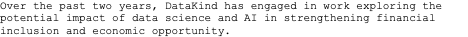
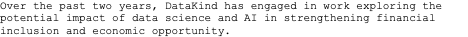
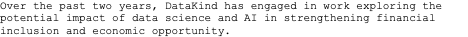
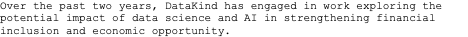
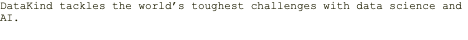
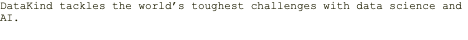
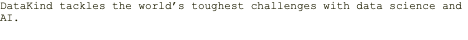
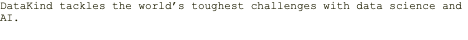
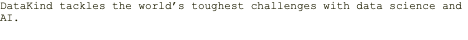
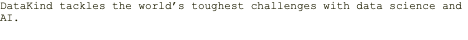
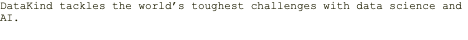
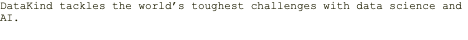
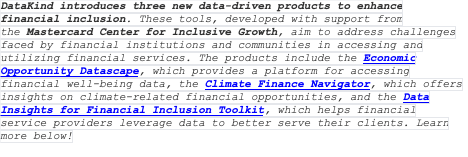
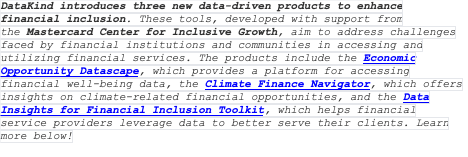
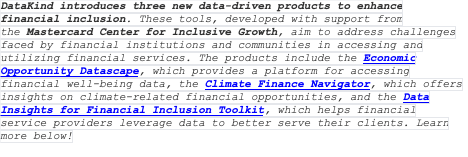
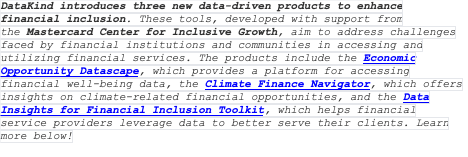
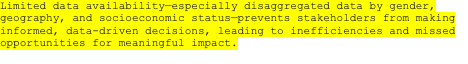
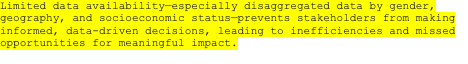
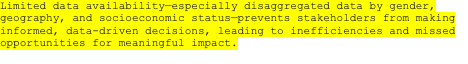
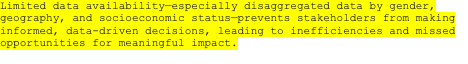

## 1 Imports

We load the *2024 FinAccess Household Survey* dataset into a pandas DataFrame, assigning it to the variable **finaccess**.

In [45]:
# Operational packages
import numpy as np
import pandas as pd
import warnings

# Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# import data
finaccess = pd.read_stata('/kaggle/input/kenya-finaccess-household-survey-2024/2024_Finaccess_Publicdata.dta', convert_categoricals=False)
census_data = pd.read_csv('/kaggle/input/2019-kenya-census-dataset/kenya-population-by-sex-and-county.csv', skiprows=[0, 1, 2, 3, 4, 5, 7], header=0)

## 2 Data Exploration

### 2.1 Initial Exploration

We begin by conducting an initial exploration of the dataset.

In [3]:
# suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# check first 5 rows
finaccess.head()

interview__key                     interview__id  county   A07  A08  A10  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233       7   225    2    1   
1    87-78-54-60  000718d26f5942998522033a66594b4c       7   223    2    3   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc      40  1514    2    3   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb      22   796    2    3   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920      21   763    2   16   

   Interview_Status  A9i  Z1  A13  ...  sacco_redress  mobilemoney_redress  \
0                 1    1   1    1  ...            NaN                  NaN   
1                 1    1   1    1  ...            NaN                  NaN   
2                 1    1   1    2  ...            NaN                  NaN   
3                 1    1   1    1  ...            NaN                  NaN   
4                 1    1   1    2  ...            NaN                  NaN   

   mobilebank_redress  not_registered_mmoney_24  using_someone_acc  \
0                 NaN                         0                NaN   
1                 NaN                         0                NaN   
2                 NaN                         0                NaN   
3                 NaN                         0                NaN   
4                 NaN                         0                1.0   

  insurance_including_NHIF_use  All_Insurance_excluding_NHIF_use  PWD  \
0                            3                                 3    0   
1                            3                                 3    0   
2                            3                                 3    0   
3                            3                                 3    0   
4                            3                                 3    0   

   Latitude  Longitude  
0 -0.435423  39.636586  
1  0.058794  40.305006  
2  0.636836  34.277390  
3 -1.251917  36.719076  
4 -0.795820  37.131085  

[5 rows x 3816 columns]

In [4]:
# check size of dataset
finaccess.shape

(20871, 3816)

We observe that the dataset consists of **20,871 rows**, each representing one of the 20,871 successfully completed interviews carried out for the Kenya 2024 FinAccess Household Survey.

The dataset includes **3,816 columns**, mostly encoded with alphanumeric labels (e.g., A01, B02), each representing a specific item in the questionnaire, as defined in the accompanying [questionnaire documentation](https://drive.google.com/file/d/1Niz_--3sC4au5gnD2-cA5z3VCKH-SqwA/view).

We identify the following metrics as central to evaluating financial inclusion and economic opportunity:

| Metric | Relevant Survey Variables|
|--------------------------|--------------------------|
| *Financial Inclusion* ||
| Account Ownership (%): Percentage of adults (15+) with an account at a financial institution or mobile money provider | C1_10, C1_11, C1_12 |
| Mobile Money Usage (%): Percentage of adults using mobile money accounts for transactions | C1_10 |
| Savings Behaviour (%): Percentage of adults who saved money in the past year (formal or informal)| C1_1a, C1_1b, C1_2, C1_3, C1_4, C1_5, C1_6, C1_7, C1_8, C1_9 |
| Borrowing Behaviour (%): Percentage of adults who borrowed money in the past year (formal or informal) | C1_13a, C1_13b, C1_13c, C1_14, C1_15, C1_16, C1_17, C1_18, C1_19, C1_20, C1_21, C1_22, C1_23, C1_24, C1_25, C1_26, C1_27, C1_28, C1_29, C1_30, C1_31 | 
| Credit Access (%): Percentage of adults who have access to credit through banks or microfinance institutions | C1_13a, C1_13b, C1_13c, C1_14 |
| Digital Payment Adoption (%): Percentage of adults using digital financial services (mobile money, online banking, etc.) | H10i__3, H10i__4, H10i__7 |
| Remittances Received (%): Percentage of adults receiving remittances from abroad | B3Bi |
| Social Protection Coverage (%): Percentage of population covered by social protection systems (pensions, social assistance, etc.) | C1_40, C1_41, C1_42, B3A__5 |
| *Economic Opportunity* ||
| Unemployment Rate (%): Proportion of the labor force that is unemployed | B3A__1, B3A__2, B3A__3, B3A__4, B3A__5, B3A__6, B3A__7, B3A__8, B3A__9, B3A__10, B3A__11, B3A__98, B3A__99 |
| Informal Employment (%): Share of workers employed without formal contracts or benefits | B3A__1, B3A__3, B3A__4 |
| Monthly Household Income: Average monthly income per household (KSh)| B3Ii |
| Access to Electricity (%): Percentage of households with access to electricity || 
| Mobile Phone Ownership (%): Percentage of adults owning a mobile phone | S1 |
| Internet Access (%): Percentage of adults with access to the internet | S2__1 |
| Distance to Nearest Bank: Average distance from a household to the nearest bank branch or financial access point (km) | T3 |
| Road Density (km per sq km): Length of roads per square kilometer of land ||
| Urban Population (%): Share of population living in urban areas | A08 |
| Land Ownership (%): Percentage of households owning agricultural or residential land | F1__1 |
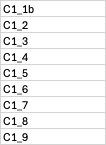
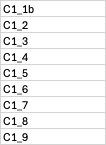
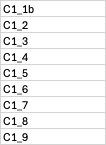
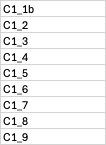
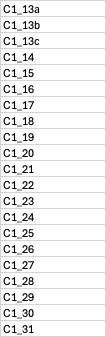
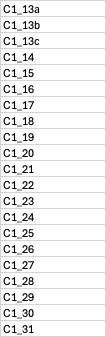
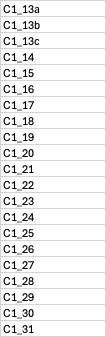
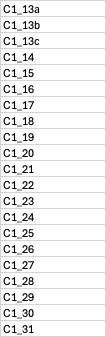
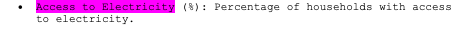
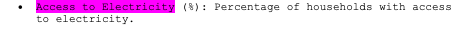
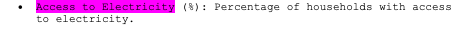
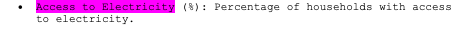

### 2.2 Data Cleaning

To streamline data cleaning and analysis, we create a subset of the DataFrame containing only the columns relevant to our study.

In [6]:
# List of columns to keep
columns_to_keep = [
    'interview__key',
    'interview__id',
                                                                                      # DEMOGRAPHICS:
    'county',                                                                         # County number
    'A07',                                                                            # Cluster number
    'Latitude', 'Longitude',                                                          # GPS location
    'A14i', 'A18',                                                                    # Age
    'Age',                                                                            # Age category
    'Sex', 'A14ii',                                                                   # Sex
    'A13',                                                                            # Sex of household head
    'A19',                                                                            # Relationship to head of household
    'A14iv',                                                                          # Highest education level
                                                                                      # FINANCIAL INCLUSION INDICATORS:
    'C1_10', 'C1_11', 'C1_12',                                                        # Account ownership & Mobile money usage
    'C1_1a', 'C1_1b', 'C1_2', 'C1_3', 'C1_4', 'C1_5', 'C1_6', 'C1_7', 'C1_8', 'C1_9', # Savings Behaviour
    'C1_13a', 'C1_13b', 'C1_13c', 'C1_14', 'C1_15', 'C1_16', 'C1_17', 'C1_18',        # Borrowing Behaviour & Credit Access
    'C1_19', 'C1_20', 'C1_21', 'C1_22', 'C1_23', 'C1_24', 'C1_25', 'C1_26',           # Borrowing Behaviour
    'C1_27', 'C1_28', 'C1_29', 'C1_30', 'C1_31',                                      # Borrowing Behaviour
    'H10i__3', 'H10i__4', 'H10i__7',                                                  # Digital Payment Adoption
    'B3Bi',                                                                           # Remittances Received
    'C1_40', 'C1_41', 'C1_42',                                                        # Social Protection Coverage
                                                                                      # POTENTIAL DRIVERS OF ECONOMIC OPPORTUNITY
    'B3A__1', 'B3A__2', 'B3A__3', 'B3A__4', 'B3A__5', 'B3A__6', 'B3A__7', 'B3A__8',   # Unemployment Rate & Informal Employment
    'B3A__9', 'B3A__10', 'B3A__11', 'B3A__98', 'B3A__99',                             # Unemployment Rate
    'B3Ii',                                                                           # Monthly Household Income
    'S1',                                                                             # Mobile Phone Ownership
    'S2__1',                                                                          # Internet Access
    'T3',                                                                             # Distance to Nearest Bank
    'A08',                                                                            # Urban population
    'F1__1',                                                                          # Land Ownership
]

# Create a new dataframe with just those columns
subset_finaccess = finaccess[columns_to_keep].copy()

# Check the first few rows of the new subset
subset_finaccess.head()

interview__key                     interview__id  county   A07  Latitude  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233       7   225 -0.435423   
1    87-78-54-60  000718d26f5942998522033a66594b4c       7   223  0.058794   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc      40  1514  0.636836   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb      22   796 -1.251917   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920      21   763 -0.795820   

   Longitude  A14i  A18  Age  Sex  ...  B3A__10  B3A__11  B3A__98  B3A__99  \
0  39.636586    29   29    3    2  ...        0        0        0        0   
1  40.305006    60   60    6    2  ...        0        1        0        0   
2  34.277390    35   35    3    2  ...        0        0        0        0   
3  36.719076    24   24    2    1  ...        0        0        0        0   
4  37.131085    20   20    2    2  ...        0        0        0        0   

      B3Ii   S1  S2__1   T3  A08  F1__1  
0  30000.0  1.0    1.0  2.0    2    0.0  
1  10000.0  1.0    0.0  2.0    2    0.0  
2   3000.0  1.0    0.0  1.0    2    0.0  
3  10000.0  1.0    0.0  1.0    2    0.0  
4  10000.0  1.0    1.0  1.0    2    0.0  

[5 rows x 74 columns]

In [7]:
# Check the size of the new DataFrame
subset_finaccess.shape

(20871, 74)

We check the data types of the columns.

In [8]:
# Get data types of columns
subset_finaccess.dtypes

# Save data types to a CSV
subset_finaccess.dtypes.to_frame(name='dtype').to_csv('finaccess_dtypes.csv')

We observe that the categorical variables **H10i__3**, **H10i__4**, **H10i__7**, **B3Bi**, **S1**, **S2__1**, **F1__1** have been assigned the *float64* datatype instead of the more appropriate *int8*. We proceed to check these columns, along with the rest of the dataset, for missing values.
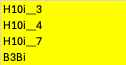
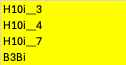
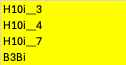
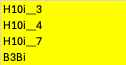
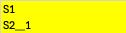
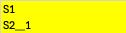
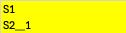
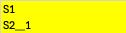

In [9]:
# Check for missing values
missing_values = subset_finaccess.isna().sum().reset_index()
missing_values.columns = ['Column', 'Missing Count']
missing_values.sort_values(by=['Missing Count'], ascending=False).head(10)

Column  Missing Count
50  H10i__7          15719
49  H10i__4          15719
48  H10i__3          15719
51     B3Bi          14092
68     B3Ii           2378
70    S2__1           1785
71       T3             45
69       S1             44
73    F1__1             30
45    C1_29              0

For the categorical variables, **H10i__3** (using mobile banking USSD), **H10i__4** (using mobile banking Apps), **H10i__7** (using internet banking), **B3Bi** (source of remmitance payments), **S2__1** (can access internet with mobile), **F1__1** (land/building ownership), we replace missing values (NaN) with 0 and convert the data type to *int8*.

In [10]:
# List of target columns
cols_to_update = ['H10i__3', 'H10i__4', 'H10i__7', 'B3Bi', 'S2__1', 'F1__1']

# Replace NaN with 0
subset_finaccess[cols_to_update] = subset_finaccess[cols_to_update].fillna(0)

# Convert data type to int8
subset_finaccess[cols_to_update] = subset_finaccess[cols_to_update].astype('int8')

For the categorical variable **S1** (mobile phone ownership), we remove rows with missing values (NaN) and convert the data type to *int8*.

In [11]:
# Drop rows with missing S1
subset_finaccess = subset_finaccess.dropna(subset=['S1'])

# Convert data type to int8
subset_finaccess['S1'] = subset_finaccess['S1'].astype('int8')

Rows with missing values in **T3** (distance to the nearest financial service provider) are removed from the dataset.

In [12]:
# Drop rows with missing T3
subset_finaccess = subset_finaccess.dropna(subset=['T3'])

For the continuous variable **B3Ii** (monthly salary), we replace missing values (NaN) with 0.0, under the assumption that non-responses indicate the absence of salaried income.

In [13]:
# Check how many respondents reported a monthly salary of '98' (don't know) or '99' (refused to answer)
((subset_finaccess['B3Ii']==98.0) | (subset_finaccess['B3Ii']==99.0)).sum()

0

In [14]:
# Check how many respondents reported a monthly salary of 0.0 
(subset_finaccess['B3Ii']==0.0).sum()

0

In [15]:
# Replace NaN with 0
subset_finaccess['B3Ii'] = subset_finaccess['B3Ii'].fillna(0.0)

In [16]:
# Check for missing values
subset_finaccess.isna().sum().sort_values(ascending=False)

interview__key    0
B3A__1            0
C1_41             0
C1_40             0
B3Bi              0
                 ..
C1_7              0
C1_6              0
C1_5              0
C1_4              0
F1__1             0
Length: 74, dtype: int64

We check for duplicate entries and remove them if necessary.

In [17]:
# Check for duplicates
subset_finaccess.duplicated().sum()

0

In [18]:
# Drop duplicates
subset_finaccess.drop_duplicates().reset_index(drop=True)

interview__key                     interview__id  county   A07  \
0        21-61-43-44  00005e63e7424aa19e63adb071955233       7   225   
1        87-78-54-60  000718d26f5942998522033a66594b4c       7   223   
2        32-71-19-84  0008721681d2468aa1ef456bba4475dc      40  1514   
3        48-18-78-99  00099e961d49470585c1a7f49fa3b7fb      22   796   
4        50-82-98-89  000bb72e959b4dd48443da902c01e920      21   763   
...              ...                               ...     ...   ...   
20821    96-94-76-93  ffefe104529e439fb916d956d10a9dc0       8  1847   
20822    40-55-72-03  fff39eec827f4ddc90e73a0792092bf9      47  1815   
20823    10-75-82-28  fff70af11a2e49649feae012317ce7d5      14   443   
20824    77-66-40-97  fff8b3b628df4b67889e26af8df90ef7       6   213   
20825    09-26-74-74  fffe9b46c1014de9be537c63c210014c      45  1706   

       Latitude  Longitude  A14i  A18  Age  Sex  ...  B3A__10  B3A__11  \
0     -0.435423  39.636586    29   29    3    2  ...        0        0   
1      0.058794  40.305006    60   60    6    2  ...        0        1   
2      0.636836  34.277390    35   35    3    2  ...        0        0   
3     -1.251917  36.719076    24   24    2    1  ...        0        0   
4     -0.795820  37.131085    20   20    2    2  ...        0        0   
...         ...        ...   ...  ...  ...  ...  ...      ...      ...   
20821  3.328605  39.788873    39   39    4    2  ...        0        0   
20822 -1.263889  36.853431    24   24    2    2  ...        0        0   
20823 -0.521351  37.568370    73   73    6    1  ...        0        0   
20824 -3.378276  38.564794    32   32    3    2  ...        0        0   
20825 -0.619969  34.784302    68   68    6    2  ...        0        0   

       B3A__98  B3A__99     B3Ii  S1  S2__1   T3  A08  F1__1  
0            0        0  30000.0   1      1  2.0    2      0  
1            0        0  10000.0   1      0  2.0    2      0  
2            0        0   3000.0   1      0  1.0    2      0  
3            0        0  10000.0   1      0  1.0    2      0  
4            0        0  10000.0   1      1  1.0    2      0  
...        ...      ...      ...  ..    ...  ...  ...    ...  
20821        0        0   6600.0   1      1  1.0    1      0  
20822        0        0  10000.0   1      0  1.0    2      0  
20823        0        0   6000.0   1      0  1.0    1      1  
20824        0        0  13000.0   1      1  1.0    2      0  
20825        0        0      0.0   4      0  1.0    1      0  

[20826 rows x 74 columns]

We check for duplicate columns and remove them if necessary.

In [19]:
# Check for duplicate columns
subset_finaccess.columns[subset_finaccess.T.duplicated()].tolist()

['A14ii']

In [20]:
# Drop the 'A14ii' column (duplicate of 'Sex')
subset_finaccess = subset_finaccess.drop(columns=['A14ii'])

# Check the shape of the cleaned dataframe
subset_finaccess.shape

(20826, 73)

We note that the dataset retains 20,826 rows, which corresponds to 99.8% of the original survey responses.

Finally, we explore the dataset of population by sex and county from the 2019 census.

In [21]:
# Check first few rows of census data
census_data.head()

name    Male  Female  Intersex    Total
0     Mombasa  610257  598046        30  1208333
1       Kwale  425121  441681        18   866820
2      Kilifi  704089  749673        25  1453787
3  Tana River  158550  157391         2   315943
4        Lamu   76103   67813         4   143920

In [22]:
# Rename the 'name' column to 'County'
census_data = census_data.rename(columns={
    'name' : 'County',
    'Total': 'Population'
})

# Add a new 'County_code' column from 1 to 47
census_data['County_code'] = range(1, 48)

# Drop 'Male', 'Female', 'Intersex' columns
subset_census_data = census_data.drop(columns=['Male', 'Female', 'Intersex'])

# Re-order columns
subset_census_data = census_data[['County_code', 'County', 'Population']]

# Check first few rows of census data
subset_census_data.head()

County_code      County  Population
0            1     Mombasa     1208333
1            2       Kwale      866820
2            3      Kilifi     1453787
3            4  Tana River      315943
4            5        Lamu      143920

### 2.3 Data Transformation

We explore the age distribution of the survey respondents.

In [23]:
# Get summary statistics for the age of survey respondents
(subset_finaccess['A14i']).describe()

count    20826.000000
mean        39.185201
std         17.228323
min         16.000000
25%         26.000000
50%         35.000000
75%         50.000000
max        110.000000
Name: A14i, dtype: float64

We observe that all respondents are adults, with "adults" being defined as individuals aged 15 years and older for the purposes of this study.

We then create two additional subsets:
 * Adults of working-age (15 to 64 years old)
 * Adults of working-age (15 to 64 years old) who are employed, including casual or informal labour

In addition, we create binary indicator variables to summarise key behaviours, such as whether a respondent has any form of savings, owns a mobile phone etc.

In [24]:
# Create subset, filtering for adults of working age (15 to 64 years old)
subset_finaccess_working_age = subset_finaccess[(subset_finaccess['A14i'] < 65)].copy()

# Create subset, filtering for adults of working age (15 to 64 years old) engaged in work
subset_finaccess_workers = subset_finaccess_working_age[subset_finaccess_working_age[['B3A__1', 'B3A__2', 'B3A__3', 'B3A__4']].eq(1).any(axis=1)
].copy()


In [25]:
# Create binary flags (1) if any specified variables equal 1
subset_finaccess['C1_account']           = subset_finaccess[['C1_10', 'C1_11', 'C1_12']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_savings']           = subset_finaccess[['C1_1a', 'C1_1b', 'C1_2', 'C1_3', 'C1_4', 'C1_5', 'C1_6', 'C1_7', 'C1_8', 'C1_9']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_borrowing']         = subset_finaccess[['C1_13a', 'C1_13b', 'C1_13c', 'C1_14', 'C1_15', 'C1_16', 'C1_17', 'C1_18', 'C1_19', 'C1_20', 'C1_21', 'C1_22', 'C1_23', 'C1_24', 'C1_25', 'C1_26', 'C1_27', 'C1_28', 'C1_29', 'C1_30', 'C1_31']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_credit']            = subset_finaccess[['C1_13a', 'C1_13b', 'C1_13c', 'C1_14']].eq(1).any(axis=1).astype(int)
subset_finaccess['H10_digital']          = subset_finaccess[['H10i__3', 'H10i__4', 'H10i__7']].eq(1).any(axis=1).astype(int)
subset_finaccess_workers['B3A_informal'] = subset_finaccess_workers[['B3A__1', 'B3A__3', 'B3A__4']].eq(1).any(axis=1).astype(int)
subset_finaccess['C1_social']            = subset_finaccess[['C1_40', 'C1_41', 'C1_42', 'B3A__5']].eq(1).any(axis=1).astype(int)

# Create binary flags (1/0) if specified variable is 1 or 2
subset_finaccess['S1_mobile']            = subset_finaccess['S1'].isin([1, 2]).astype(int)

# Create binary flags (1/0) if specified variable is 1, 2 or 3
subset_finaccess['B3Bi_remittance']      = subset_finaccess['B3Bi'].isin([1, 2, 3]).astype(int)

# Create binary flags (1) if all specified variables equal 0
subset_finaccess_working_age['B3A_unemployment']  = subset_finaccess_working_age[['B3A__1', 'B3A__2', 'B3A__3', 'B3A__4']].eq(0).all(axis=1).astype(int)


We calculate metrics for financial inclusion and economic opportunity by county.

In [26]:
# Group by 'county' and compute metrics for adults
summary_subset_finaccess_all_adults = subset_finaccess.groupby('county').agg(
    account_ownership               = ('C1_account', lambda x: x.mean() * 100),
    mobile_money_usage              = ('C1_10', lambda x: (x == 1).mean() * 100),
    savings_behaviour               = ('C1_savings', lambda x: x.mean() * 100),
    borrowing_behaviour             = ('C1_borrowing', lambda x: x.mean() * 100),
    credit_access                   = ('C1_credit', lambda x: x.mean() * 100),
    digital_payment_adoption        = ('H10_digital', lambda x: x.mean() * 100),
    remittances_received            = ('B3Bi_remittance', lambda x: x.mean() * 100),
    monthly_household_income        = ('B3Ii', 'mean'),
    social_protection_coverage      = ('C1_social', lambda x: x.mean() * 100),
    mobile_phone_ownership          = ('S1_mobile', lambda x: x.mean() * 100),
    internet_access                 = ('S2__1', lambda x: (x == 1).mean() * 100),
    distance_to_nearest_bank        = ('T3', 'mean'),
    urban_population                = ('A08', lambda x: (x == 2).mean() * 100),
    land_ownership                  = ('F1__1', lambda x: (x == 1).mean() * 100),
    account_ownership_excl          = ('C1_account', lambda x: (1 - x.mean()) * 100),
    mobile_money_usage_excl         = ('C1_10', lambda x: (1 - ((x == 1).mean())) * 100),
    mobile_phone_excl               = ('S1_mobile', lambda x: (1 - x.mean()) * 100)
).reset_index()

# Group by 'county' and compute metrics for working age adults
summary_subset_finaccess_working_age = subset_finaccess_working_age.groupby('county').agg(
    unemployment_rate               = ('B3A_unemployment', lambda x: x.mean() * 100),
).reset_index()

# Group by 'county' and compute metrics for working age adults also engaged in work
summary_subset_finaccess_workers = subset_finaccess_workers.groupby('county').agg(
    informal_employment = ('B3A_informal', lambda x: x.mean() * 100),
).reset_index()

# Merge into one consolidated dataset
finaccess_merged_summary = summary_subset_finaccess_all_adults.merge(
    summary_subset_finaccess_working_age,
    on='county'
).merge(
    summary_subset_finaccess_workers,
    on='county',
)

# Output merged summary to CSV
finaccess_merged_summary.to_csv('finaccess_metrics_by_county.csv')

# Display first few rows of merged summary
finaccess_merged_summary.head()

county  account_ownership  mobile_money_usage  savings_behaviour  \
0       1          81.411765           80.235294          52.470588   
1       2          82.037534           80.965147          68.364611   
2       3          73.584906           72.830189          55.471698   
3       4          70.270270           69.669670          18.918919   
4       5          81.782946           81.782946          26.744186   

   borrowing_behaviour  credit_access  digital_payment_adoption  \
0            61.176471       3.058824                 13.411765   
1            57.104558       4.021448                 12.064343   
2            57.735849       3.018868                  7.735849   
3            33.933934       2.102102                  3.903904   
4            29.069767       2.325581                 10.077519   

   remittances_received  monthly_household_income  social_protection_coverage  \
0             35.529412              11626.517647                    9.882353   
1             35.120643               9072.654155                   11.796247   
2             43.207547               7682.641509                    9.245283   
3             57.357357               5124.024024                    4.504505   
4             47.286822               6523.255814                    5.426357   

   mobile_phone_ownership  internet_access  distance_to_nearest_bank  \
0               90.823529        67.058824                  1.237647   
1               83.914209        45.308311                  2.563003   
2               81.509434        43.584906                  1.728302   
3               74.174174        22.522523                  2.978979   
4               82.945736        44.961240                  1.786822   

   urban_population  land_ownership  account_ownership_excl  \
0        100.000000       13.411765               18.588235   
1         30.831099       16.890080               17.962466   
2         42.641509        9.245283               26.415094   
3         36.636637        7.507508               29.729730   
4         36.434109       14.728682               18.217054   

   mobile_money_usage_excl  mobile_phone_excl  unemployment_rate  \
0                19.764706           9.176471          18.689320   
1                19.034853          16.085791          18.584071   
2                27.169811          18.490566          27.348643   
3                30.330330          25.825826          56.351792   
4                18.217054          17.054264          42.259414   

   informal_employment  
0            86.865672  
1            89.492754  
2            90.229885  
3            83.582090  
4            86.231884

We calculate metrics for financial inclusion and economic opportunity by both county and age.

In [27]:
# Define the bins for the age ranges
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, np.inf]

# Define the age group labels
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

# Categorise the ages into the defined bins
subset_finaccess['age_category'] = pd.cut(subset_finaccess['A14i'], bins=bins, labels=labels, right=False)

# Group by age and compute metrics
age_profile_subset_finaccess = subset_finaccess.groupby(['county', 'age_category'], observed=False).agg(
    account_ownership               = ('C1_account', lambda x: x.mean() * 100),
    mobile_money_usage              = ('C1_10', lambda x: (x == 1).mean() * 100),
    savings_behaviour               = ('C1_savings', lambda x: x.mean() * 100),
    borrowing_behaviour             = ('C1_borrowing', lambda x: x.mean() * 100),
    credit_access                   = ('C1_credit', lambda x: x.mean() * 100),
    digital_payment_adoption        = ('H10_digital', lambda x: x.mean() * 100),
    remittances_received            = ('B3Bi_remittance', lambda x: x.mean() * 100),
    monthly_household_income        = ('B3Ii', 'mean'),
    social_protection_coverage      = ('C1_social', lambda x: x.mean() * 100),
    mobile_phone_ownership          = ('S1_mobile', lambda x: x.mean() * 100),
    internet_access                 = ('S2__1', lambda x: (x == 1).mean() * 100),
    distance_to_nearest_bank        = ('T3', 'mean'),
    urban_population                = ('A08', lambda x: (x == 2).mean() * 100),
    land_ownership                  = ('F1__1', lambda x: (x == 1).mean() * 100),
    account_ownership_excl          = ('C1_account', lambda x: (1 - x.mean()) * 100),
    mobile_money_usage_excl         = ('C1_10', lambda x: (1 - ((x == 1).mean())) * 100),
    mobile_phone_excl               = ('S1_mobile', lambda x: (1 - x.mean()) * 100)
).reset_index()

age_profile_subset_finaccess.head()

county age_category  account_ownership  mobile_money_usage  \
0       1        15-19          23.076923           20.512821   
1       1        20-24          76.712329           76.712329   
2       1        25-29          91.358025           90.123457   
3       1        30-34          87.301587           84.126984   
4       1        35-39          93.478261           93.478261   

   savings_behaviour  borrowing_behaviour  credit_access  \
0          35.897436            20.512821       0.000000   
1          57.534247            57.534247       0.000000   
2          62.962963            67.901235       2.469136   
3          60.317460            77.777778       1.587302   
4          56.521739            71.739130       6.521739   

   digital_payment_adoption  remittances_received  monthly_household_income  \
0                  2.564103             61.538462               4205.641026   
1                 13.698630             54.794521               8963.698630   
2                 13.580247             34.567901              12382.716049   
3                 15.873016             31.746032              11784.126984   
4                 21.739130             17.391304              15163.043478   

   social_protection_coverage  mobile_phone_ownership  internet_access  \
0                    0.000000               61.538462        66.666667   
1                    5.479452               94.520548        67.123288   
2                   13.580247               95.061728        81.481481   
3                    9.523810               92.063492        73.015873   
4                   17.391304               97.826087        73.913043   

   distance_to_nearest_bank  urban_population  land_ownership  \
0                  1.000000             100.0        2.564103   
1                  1.027397             100.0        4.109589   
2                  1.000000             100.0       11.111111   
3                  1.000000             100.0       12.698413   
4                  1.043478             100.0       17.391304   

   account_ownership_excl  mobile_money_usage_excl  mobile_phone_excl  
0               76.923077                79.487179          38.461538  
1               23.287671                23.287671           5.479452  
2                8.641975                 9.876543           4.938272  
3               12.698413                15.873016           7.936508  
4                6.521739                 6.521739           2.173913

Finally, we calculate metrics for financial inclusion and economic opportunity by both county and gender.

In [29]:
# Map categorical labels
sex_labels = {1: 'Male', 2: 'Female'}
subset_finaccess['sex_labelled'] = subset_finaccess['Sex'].map(sex_labels)

# Group by sex and compute metrics
sex_subset_finaccess = subset_finaccess.groupby(['county', 'sex_labelled']).agg(
    account_ownership               = ('C1_account', lambda x: x.mean() * 100),
    mobile_money_usage              = ('C1_10', lambda x: (x == 1).mean() * 100),
    savings_behaviour               = ('C1_savings', lambda x: x.mean() * 100),
    borrowing_behaviour             = ('C1_borrowing', lambda x: x.mean() * 100),
    credit_access                   = ('C1_credit', lambda x: x.mean() * 100),
    digital_payment_adoption        = ('H10_digital', lambda x: x.mean() * 100),
    remittances_received            = ('B3Bi_remittance', lambda x: x.mean() * 100),
    monthly_household_income        = ('B3Ii', 'mean'),
    social_protection_coverage      = ('C1_social', lambda x: x.mean() * 100),
    mobile_phone_ownership          = ('S1_mobile', lambda x: x.mean() * 100),
    internet_access                 = ('S2__1', lambda x: (x == 1).mean() * 100),
    distance_to_nearest_bank        = ('T3', 'mean'),
    urban_population                = ('A08', lambda x: (x == 2).mean() * 100),
    land_ownership                  = ('F1__1', lambda x: (x == 1).mean() * 100),
    account_ownership_excl          = ('C1_account', lambda x: (1 - x.mean()) * 100),
    mobile_money_usage_excl         = ('C1_10', lambda x: (1 - ((x == 1).mean())) * 100),
    savings_behaviour_excl          = ('C1_savings', lambda x: (1 - x.mean()) * 100),
    borrowing_behaviour_excl        = ('C1_borrowing', lambda x: (1 - x.mean()) * 100),
    credit_access_excl              = ('C1_credit', lambda x: (1 - x.mean()) * 100),
    digital_payment_adoption_excl   = ('H10_digital', lambda x: (1 - x.mean()) * 100),
    remittances_received_excl       = ('B3Bi_remittance', lambda x: (1 - x.mean()) * 100),
    mobile_phone_excl               = ('S1_mobile', lambda x: (1 - x.mean()) * 100)
).reset_index()

sex_subset_finaccess.head()

county sex_labelled  account_ownership  mobile_money_usage  \
0       1       Female          77.952756           76.771654   
1       1         Male          86.549708           85.380117   
2       2       Female          80.568720           79.620853   
3       2         Male          83.950617           82.716049   
4       3       Female          73.780488           73.170732   

   savings_behaviour  borrowing_behaviour  credit_access  \
0          49.606299            59.448819       1.574803   
1          56.725146            63.742690       5.263158   
2          68.246445            55.924171       2.843602   
3          68.518519            58.641975       5.555556   
4          56.402439            56.707317       2.134146   

   digital_payment_adoption  remittances_received  monthly_household_income  \
0                 10.236220             41.732283               8941.614173   
1                 18.128655             26.315789              15614.619883   
2                  7.109005             41.706161               6843.127962   
3                 18.518519             26.543210              11976.543210   
4                  6.402439             51.524390               5730.945122   

   ...  urban_population  land_ownership  account_ownership_excl  \
0  ...        100.000000        9.842520               22.047244   
1  ...        100.000000       18.713450               13.450292   
2  ...         32.701422        9.952607               19.431280   
3  ...         28.395062       25.925926               16.049383   
4  ...         43.902439        7.317073               26.219512   

   mobile_money_usage_excl  savings_behaviour_excl  borrowing_behaviour_excl  \
0                23.228346               50.393701                 40.551181   
1                14.619883               43.274854                 36.257310   
2                20.379147               31.753555                 44.075829   
3                17.283951               31.481481                 41.358025   
4                26.829268               43.597561                 43.292683   

   credit_access_excl  digital_payment_adoption_excl  \
0           98.425197                      89.763780   
1           94.736842                      81.871345   
2           97.156398                      92.890995   
3           94.444444                      81.481481   
4           97.865854                      93.597561   

   remittances_received_excl  mobile_phone_excl  
0                  58.267717          10.629921  
1                  73.684211           7.017544  
2                  58.293839          17.061611  
3                  73.456790          14.814815  
4                  48.475610          19.207317  

[5 rows x 24 columns]

## 3 Data Analysis & Visualisation

### 3.1 Survey Demographics

To evaluate the survey's demographics, we compare the age distribution of survey respondents with the [2019 census data](https://www.knbs.or.ke/wp-content/uploads/2023/09/2019-Kenya-population-and-Housing-Census-Volume-3-Distribution-of-Population-by-Age-and-Sex.pdf).

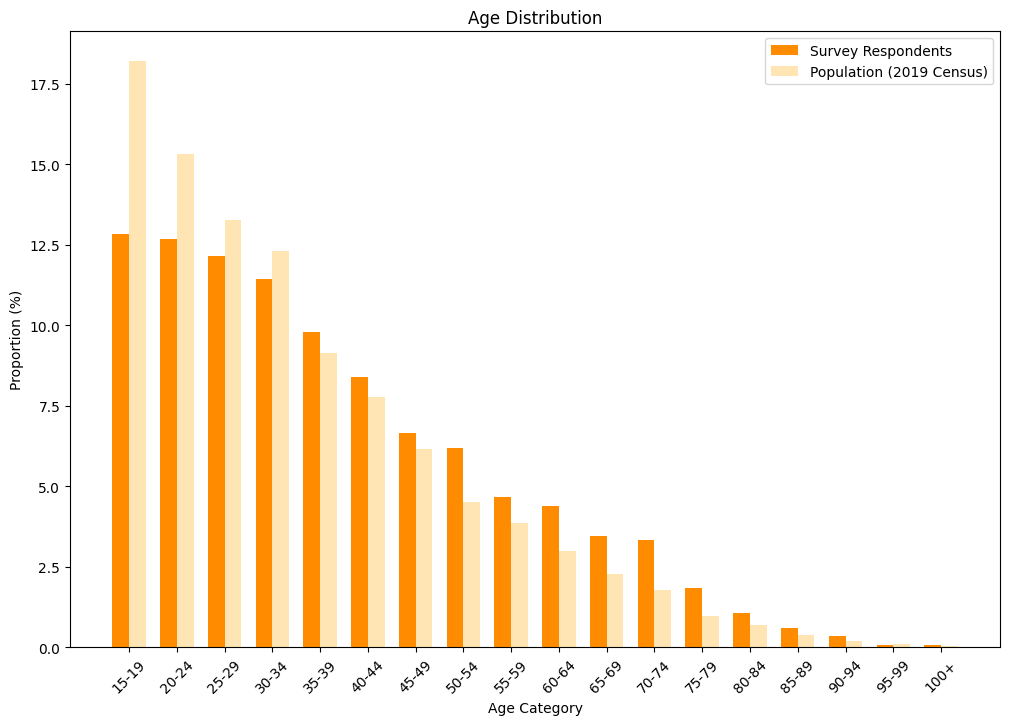

In [30]:
# Create the figure
plt.figure(figsize=(12, 8))

# Calculate the count or proportion for each age group in subset_finaccess
age_counts = subset_finaccess['age_category'].value_counts(normalize=True) * 100  # Normalize to get proportions

# Age group data for population counts (2019 census)
age_groups = {
    '15-19': 5285857,
    '20-24': 4447674,
    '25-29': 3854555,
    '30-34': 3570719,
    '35-39': 2650116,
    '40-44': 2259231,
    '45-49': 1786256,
    '50-54': 1308610,
    '55-59': 1118094,
    '60-64':  870022,
    '65-69':  658178,
    '70-74':  514539,
    '75-79':  283122,
    '80-84':  203897,
    '85-89':  113610,
    '90-94':   55101,
    '95-99':   28006,
    '100+' :   14040}

# Extracting data for population counts
age_labels = list(age_groups.keys())
population_counts = list(age_groups.values())

# Calculate total adult population
total_population = sum(population_counts)

# Convert population counts to proportions (%)
age_proportions = [count / total_population * 100 for count in population_counts]

# Set bar width and x position adjustment for side-by-side bars
width = 0.35  # Bar width
x_positions = np.arange(len(age_labels))  # X positions for the age groups

# Plot the first (subset_finaccess) and second (age_groups) data side-by-side
plt.bar(x_positions - width / 2, age_counts, width=width, color='#FF8C00', label='Survey Respondents')
plt.bar(x_positions + width / 2, age_proportions, width=width, color='#FFE5B4', label='Population (2019 Census)')

# Adding title and labels
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Proportion (%)')
plt.xticks(x_positions, age_labels, rotation=45)

# Add a legend
plt.legend()

# Save to file
plt.savefig("finaccess_survey_demographics1.png", dpi=300)

# Display the plot
plt.show()

We observe that younger age groups (15-34) are somewhat underrepresented in the survey, which may be attributed to the survey's focus on the head of the household. Additionally, it is possible that demographic shifts have occurred since the 2019 census.

We compare the gender distribution of survey respondents with the [2019 census data](https://www.knbs.or.ke/2019-kenya-population-and-housing-census-results/).

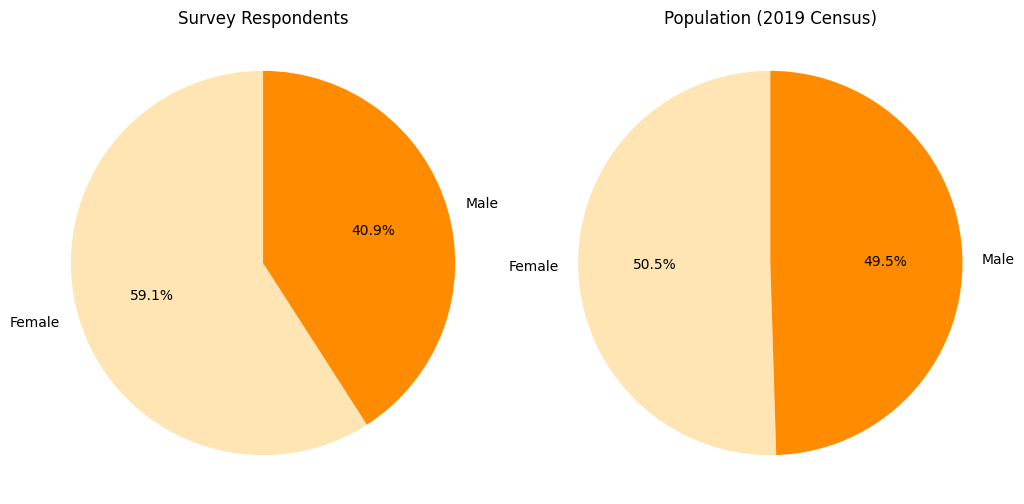

In [31]:
# Count occurrences
sex_counts = subset_finaccess['sex_labelled'].value_counts()

# Define orange shades
orange_shades = ['#FFE5B4', '#FF8C00']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the first pie chart
plt.subplot(1, 2, 1)
plt.pie(
    sex_counts,
    labels=sex_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=orange_shades
)
plt.title('Survey Respondents')
plt.axis('equal')

# Plot the second pie chart
plt.subplot(1, 2, 2)

# 2019 Census data
sex_census = {'Female': 24014716, 'Male': 23548056}

# Plot pie chart
plt.pie(
    sex_census.values(),  # Data for pie chart
    labels=sex_census.keys(),  # Labels for pie chart
    autopct='%1.1f%%',
    startangle=90,
    colors=orange_shades
)
plt.title('Population (2019 Census)')
plt.axis('equal')

# Save to file
plt.savefig("finaccess_survey_demographics2.png", dpi=300)

# Display the plot
plt.show()

We observe that females are somewhat overrepresented in the survey, which may be due to practical factors related to how the survey was conducted.

We compare the type of residence (urban vs. rural) of survey respondents with the [2019 census data](https://housingfinanceafrica.org/app/uploads/VOLUME-II-KPHC-2019.pdf).

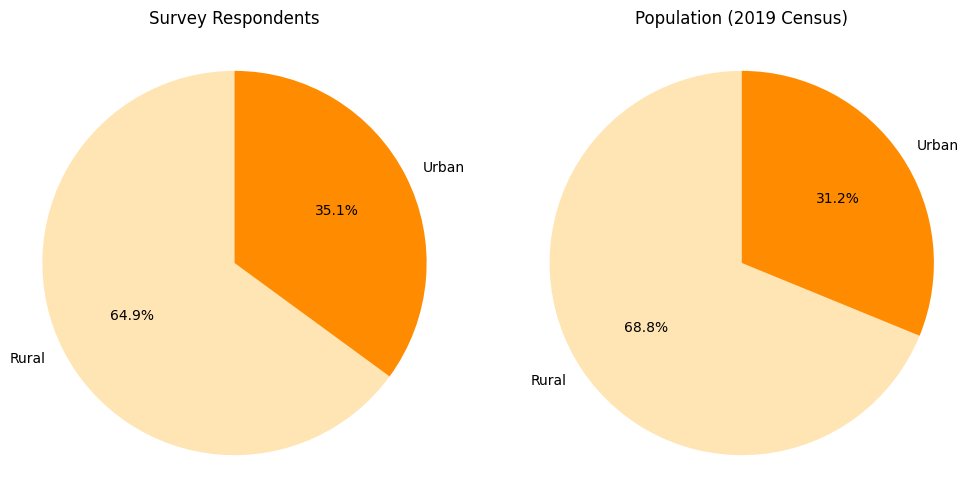

In [32]:
# Map categorical labels
environment_labels = {1: 'Rural', 2: 'Urban'}
subset_finaccess['environment'] = subset_finaccess['A08'].map(environment_labels)

# Count occurrences
environment_counts = subset_finaccess['environment'].value_counts()

# Define orange shades
orange_shades = ['#FFE5B4', '#FF8C00']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot the first pie chart
plt.subplot(1, 2, 1)
plt.pie(
    environment_counts,
    labels=environment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=orange_shades
)
plt.title('Survey Respondents')
plt.axis('equal')

# Plot the second pie chart
plt.subplot(1, 2, 2)

# 2019 Census data
environment_census = {'Rural': 32732596, 'Urban': 14831700}

# Plot pie chart
plt.pie(
    environment_census.values(),
    labels=environment_census.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=orange_shades
)
plt.title('Population (2019 Census)')
plt.axis('equal')

# Save to file
plt.savefig("finaccess_survey_demographics3.png", dpi=300)

# Display the plot
plt.show()

We observe that the proportion of urban and rural households in the survey aligns broadly with the 2019 census data.

Finally, we visualise the distribution of surveyed households by county and compare with the 2019 census data.

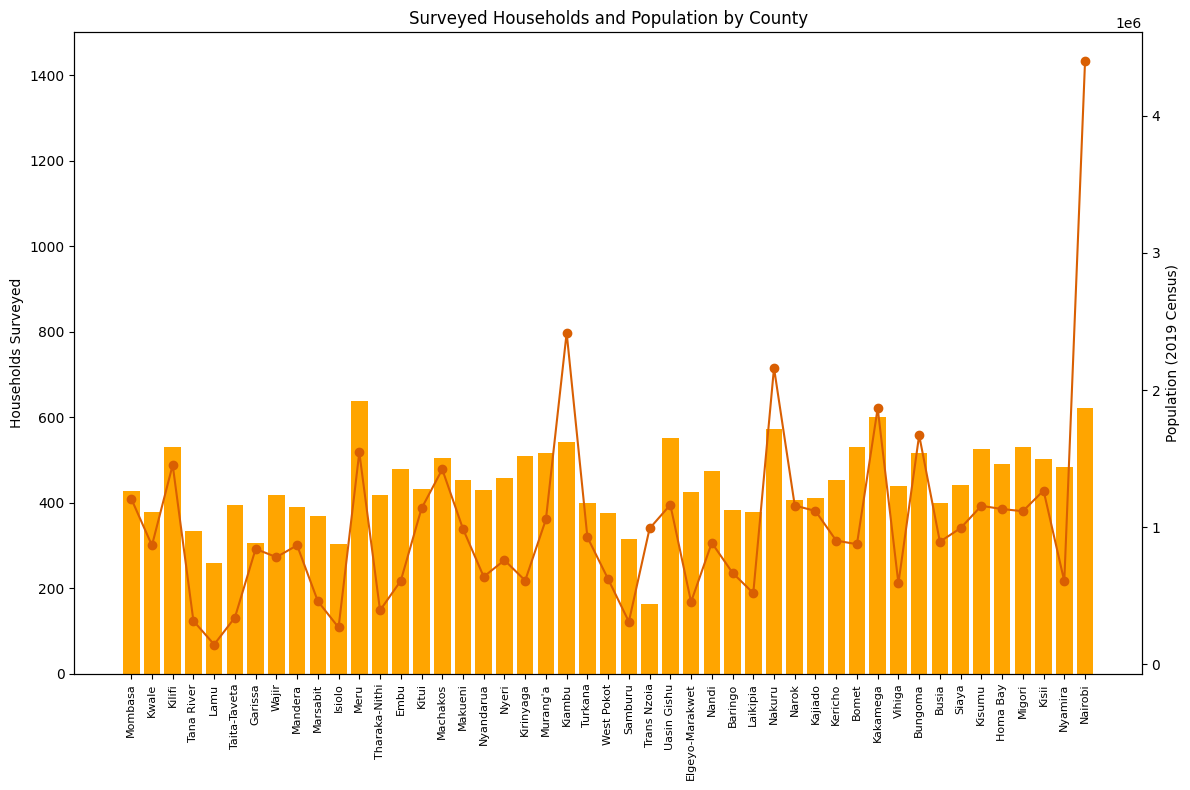

In [36]:
# Count households represented by county in FinAccess Household Survey 
county_counts = finaccess['county'].value_counts().sort_index()
all_counties = pd.Series(0, index=range(1, 48))
county_counts = all_counties.add(county_counts, fill_value=0)

# Convert Series to DataFrame
county_counts = county_counts.rename_axis('county_code').reset_index(name='household_count')

# Merge household counts with census population data
merged_df = county_counts.merge(subset_census_data, left_on='county_code', right_on='County_code')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# First y-axis: household survey counts
ax1.bar(merged_df['County'], merged_df['household_count'], color='orange', label='Household Count')
ax1.set_xlabel('')
ax1.set_ylabel('Households Surveyed')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 1500)

# Second y-axis: population data
ax2 = ax1.twinx()
ax2.plot(merged_df['County'], merged_df['Population'], color='#D95F02', marker='o', label='Population')
ax2.set_ylabel('Population (2019 Census)')
ax2.tick_params(axis='y')

# Set x-axis labels and rotation
ax1.set_xticks(merged_df['County'])
ax1.set_xticklabels(merged_df['County'], rotation=90, fontsize=8)

# Title and layout
plt.title('Surveyed Households and Population by County')
fig.tight_layout()

# Save to file
plt.savefig("finaccess_survey_demographics4.png", dpi=300)

# Show plot
plt.show()

We observe discrepancies between the household survey sample and the population distribution. For instance, the capital city, Nairobi, is significantly underrepresented. To obtain accurate country-wide statistics, the data would need to be weighted according to the population of each county. However, for the purposes of our study, which focuses on statistics by county, weighting is not necessary.

### 3.2 Financial Inclusion

We create choropleth maps to visualise key metrics of financial inclusion and exclusion across counties.

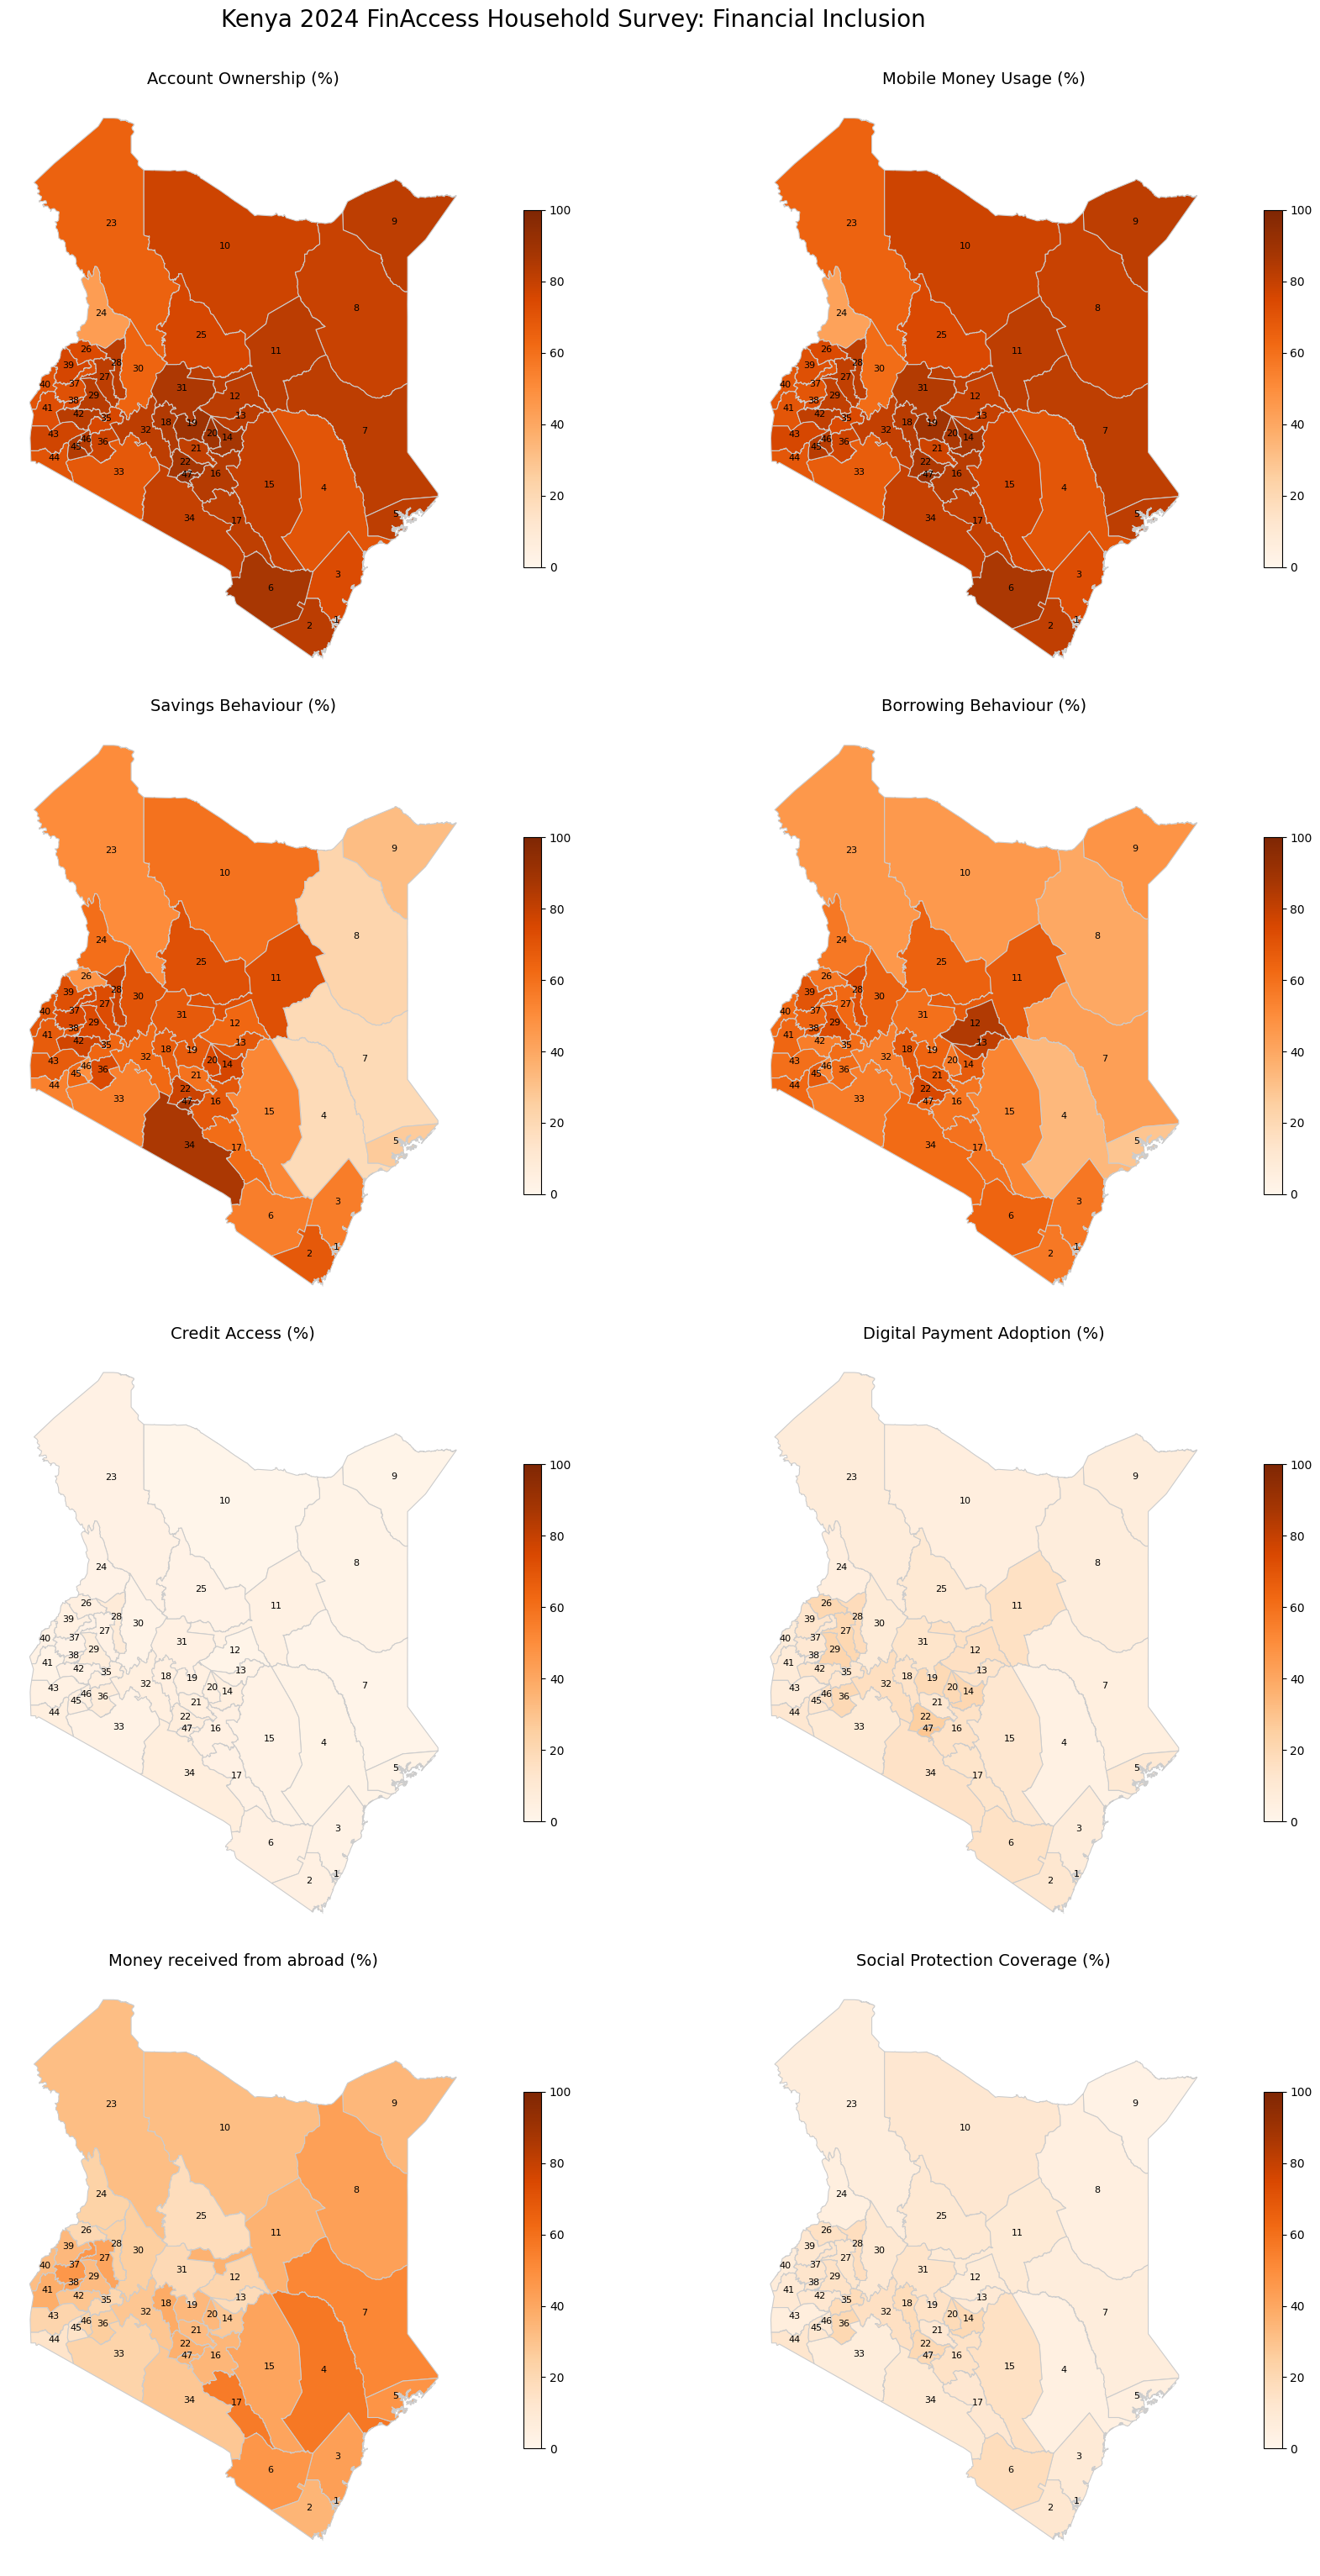

In [37]:
# Path to your shapefile (replace with the correct file path)
shapefile_path = '/kaggle/input/kenya-counties/Ken_Counties/County.shp'

# Read the shapefile into a GeoDataFrame
county_map = gpd.read_file(shapefile_path)

# Change data type of COUNTY_ID to integer
county_map['COUNTY_ID'] = county_map['COUNTY_ID'].astype(int)

# Merge summary statistics with map data
kenya_map = county_map.merge(finaccess_merged_summary, how='left', left_on='COUNTY_ID', right_on='county')

# Set-up grid for maps
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 4 rows, 2 columns

# Flatten axes for easy looping
axes = axes.flatten()

# List of columns to plot
columns_to_plot = ['account_ownership',
                   'mobile_money_usage',
                   'savings_behaviour',
                   'borrowing_behaviour',
                   'credit_access',
                   'digital_payment_adoption',
                   'remittances_received',
                   'social_protection_coverage']

titles = ['Account Ownership (%)',
          'Mobile Money Usage (%)',
          'Savings Behaviour (%)',
          'Borrowing Behaviour (%)',
          'Credit Access (%)',
          'Digital Payment Adoption (%)',
          'Money received from abroad (%)',
          'Social Protection Coverage (%)',]

for i, col in enumerate(columns_to_plot):
    kenya_map.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i],
        edgecolor='0.8',
        vmin=0,
        vmax=100,
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Financial Inclusion', fontsize=20, y=1.02)

# Save to file
plt.savefig("finaccess_inclusion_maps.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

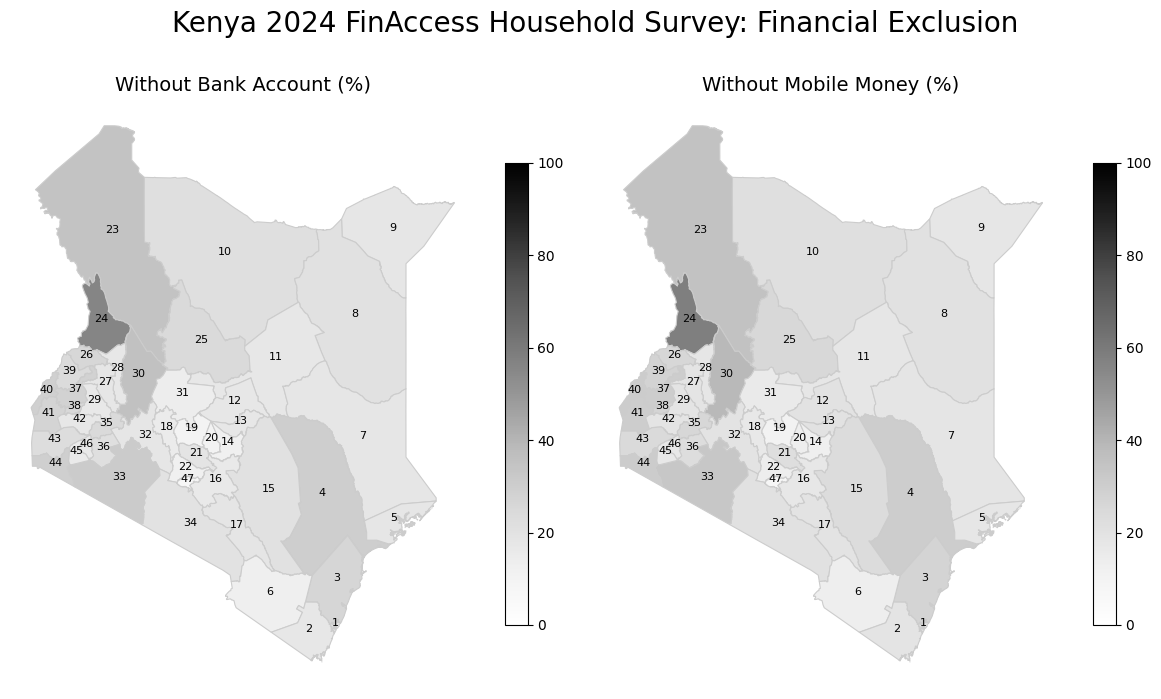

In [38]:
# Set-up grid for maps
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Flatten axes for easy looping
axes = axes.flatten()

# List of columns to plot
columns_to_plot2 = ['account_ownership_excl',
                   'mobile_money_usage_excl']

titles2 = ['Without Bank Account (%)',
          'Without Mobile Money (%)']

for i, col in enumerate(columns_to_plot2):
    kenya_map.plot(
        column=col,
        cmap='Greys',
        linewidth=0.8,
        ax=axes[i],
        edgecolor='0.8',
        vmin=0,
        vmax=100,
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i].set_title(titles2[i], fontdict={'fontsize': 14})
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Financial Exclusion', fontsize=20)

# Save to file
plt.savefig("finaccess_exclusion_maps.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

In [39]:
# Descriptive statistics
kenya_map[columns_to_plot].describe()

account_ownership  mobile_money_usage  savings_behaviour  \
count          47.000000           47.000000          47.000000   
mean           78.779891           77.451500          61.738093   
std             8.162558            8.371803          16.104671   
min            44.117647           41.978610          18.918919   
25%            74.937749           73.443919          54.846948   
50%            81.497797           80.062794          67.346939   
75%            82.710449           81.916389          72.109231   
max            92.532468           92.045455          87.175325   

       borrowing_behaviour  credit_access  digital_payment_adoption  \
count            47.000000      47.000000                 47.000000   
mean             60.248801       3.878691                 13.231079   
std              10.833926       1.738914                  5.463711   
min              29.069767       0.542005                  3.903904   
25%              56.108728       2.658730                  9.131646   
50%              61.698113       3.673469                 13.229572   
75%              66.506212       4.954225                 15.736543   
max              84.615385       8.215962                 28.571429   

       remittances_received  social_protection_coverage  
count             47.000000                   47.000000  
mean              32.703782                   12.099387  
std               10.414308                    4.629096  
min               13.747646                    3.076923  
25%               24.125186                    9.392378  
50%               32.748538                   11.729622  
75%               38.372982                   15.216184  
max               57.357357                   20.377358

In [40]:
# Extract top and bottom counties by account ownership
print(kenya_map[['COUNTY', 'county', 'account_ownership']].sort_values(by='account_ownership', ascending=False).head().to_string(index=False))
print()
print(kenya_map[['COUNTY', 'county', 'account_ownership']].sort_values(by='account_ownership', ascending=False).tail().to_string(index=False))
print()

# Extract top and bottom counties by mobile money usage
print(kenya_map[['COUNTY', 'county', 'mobile_money_usage']].sort_values(by='mobile_money_usage', ascending=False).head().to_string(index=False))
print()
print(kenya_map[['COUNTY', 'county', 'mobile_money_usage']].sort_values(by='mobile_money_usage', ascending=False).tail().to_string(index=False))
print()

# Extract top and bottom counties by savings behaviour
print(kenya_map[['COUNTY', 'county', 'savings_behaviour']].sort_values(by='savings_behaviour', ascending=False).head().to_string(index=False))
print()
print(kenya_map[['COUNTY', 'county', 'savings_behaviour']].sort_values(by='savings_behaviour', ascending=False).tail().to_string(index=False))
print()

# Extract top and bottom counties by remittances received
print(kenya_map[['COUNTY', 'county', 'remittances_received']].sort_values(by='remittances_received', ascending=False).head().to_string(index=False))
print()
print(kenya_map[['COUNTY', 'county', 'remittances_received']].sort_values(by='remittances_received', ascending=False).tail().to_string(index=False))
print()

   COUNTY  county  account_ownership
  Nairobi      47          92.532468
    Nyeri      19          90.153173
Kirinyaga      20          89.370079
     Embu      14          87.815126
   Kiambu      22          87.663551

    COUNTY  county  account_ownership
Tana River       4          70.270270
     Narok      33          68.407960
   Turkana      23          65.000000
   Baringo      30          64.304462
West Pokot      24          44.117647

      COUNTY  county  mobile_money_usage
     Nairobi      47           92.045455
       Nyeri      19           89.059081
        Embu      14           86.974790
Taita Taveta       6           86.259542
   Kirinyaga      20           86.220472

    COUNTY  county  mobile_money_usage
     Busia      40           69.191919
     Narok      33           66.915423
   Turkana      23           64.500000
   Baringo      30           61.154856
West Pokot      24           41.978610

        COUNTY  county  savings_behaviour
       Nairobi      47  

We observe that account ownership is unevenly distributed across the country, with the highest rate in the capital, Nairobi (92.5%), and the lowest in West Pokot (44.1%), resulting in a county-level mean of 78.8%.

A similar pattern is evident in the percentage of adults using mobile money accounts, with the highest rate again in Nairobi (92.0%) and the lowest in West Pokot (41.9%), yielding a county-level mean of 77.5%.

The percentage of adults using savings products shows significant variation, with the highest rate in Nairobi (87.1%) and the lowest in Tana River (18.9%), and a county-level mean of 61.7%.

Interestingly, some counties with the lowest savings rates, such as Tana River (57.4%), have the highest percentage of households receiving remittances from abroad.

Credit access, digital payment adoption, and social protection coverage are all notably low, with county-level mean values ranging from 5% to 13%.

We create visualisations to explore how financial exclusion varies with age in the counties with the highest and lowest rates of bank account ownership — Nairobi and West Pokot — as well as in the national average across counties.

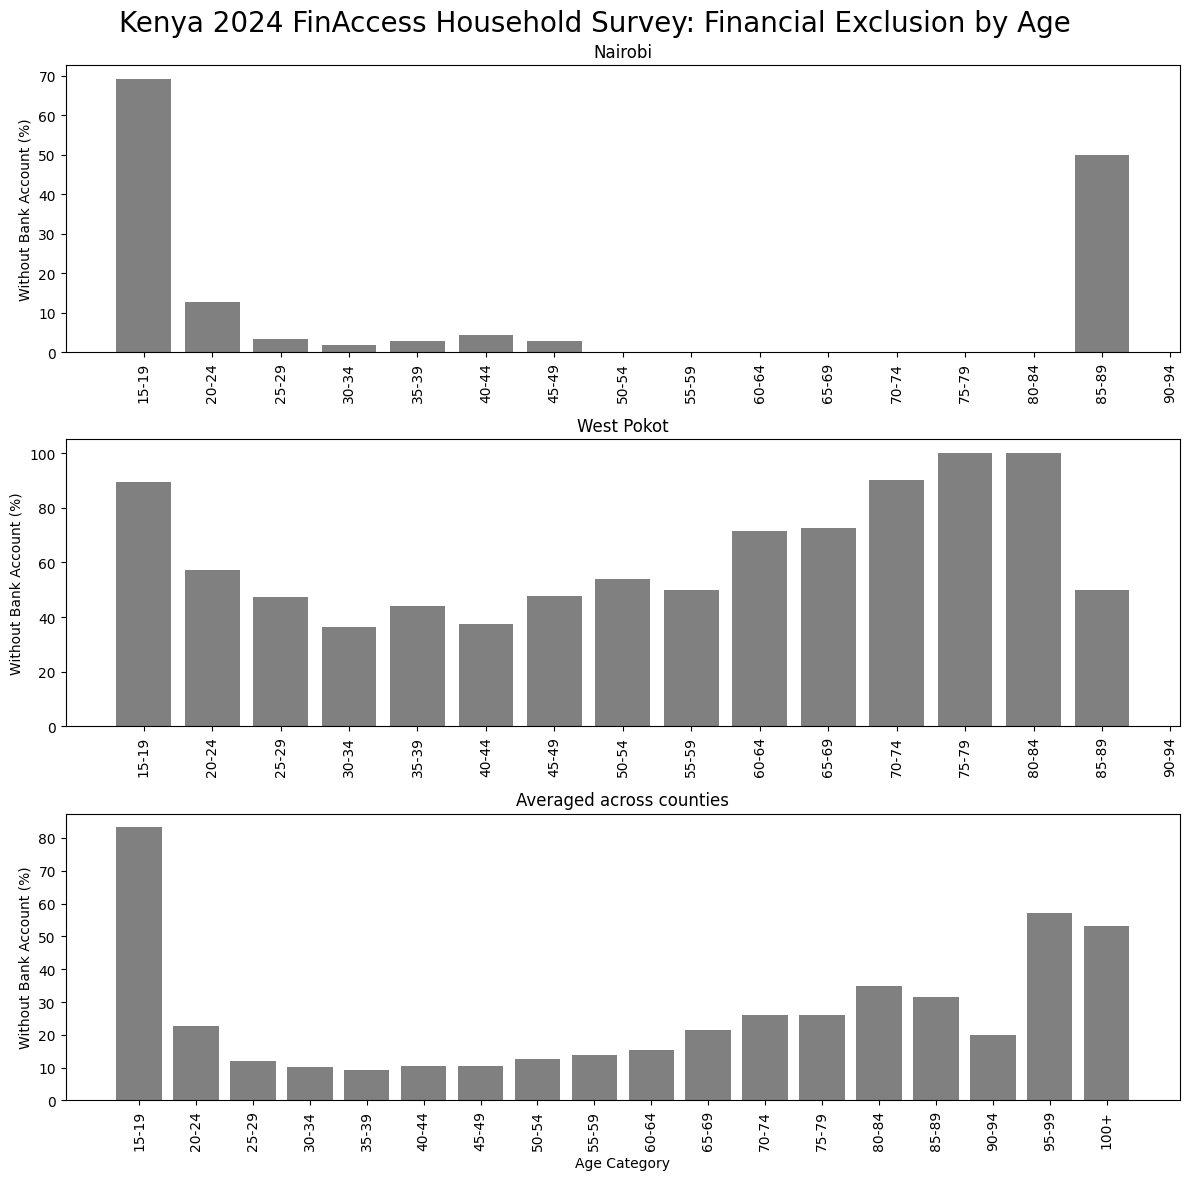

In [41]:
# Create the figure
plt.figure(figsize=(12, 12))

# Nairobi data
age_profile_Nairobi_finaccess = age_profile_subset_finaccess[(age_profile_subset_finaccess['county'] == 47)]

# Plot the first bar chart
plt.subplot(3, 1, 1)
plt.bar(age_profile_Nairobi_finaccess['age_category'], age_profile_Nairobi_finaccess['account_ownership_excl'], color='grey')
plt.xlabel('')
plt.ylabel('Without Bank Account (%)')
plt.xticks(rotation=90)
plt.title('Nairobi')

# West Pokot data
age_profile_WP_finaccess = age_profile_subset_finaccess[(age_profile_subset_finaccess['county'] == 24)]

# Plot the second bar chart
plt.subplot(3, 1, 2)
plt.bar(age_profile_WP_finaccess['age_category'], age_profile_WP_finaccess['account_ownership_excl'], color='grey')
plt.xlabel('')
plt.ylabel('Without Bank Account (%)')
plt.xticks(rotation=90)
plt.title('West Pokot')

# Averaged across counties data
age_profile_av_county_finaccess = age_profile_subset_finaccess.groupby('age_category', observed=False)['account_ownership_excl'].mean().reset_index()

# Plot the third bar chart
plt.subplot(3, 1, 3)
plt.bar(age_profile_av_county_finaccess['age_category'], age_profile_av_county_finaccess['account_ownership_excl'], color='grey')
plt.xlabel('Age Category')
plt.ylabel('Without Bank Account (%)')
plt.xticks(rotation=90)
plt.title('Averaged across counties')

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Financial Exclusion by Age', fontsize=20)

# Adjust layout
plt.tight_layout()

# Save to file
plt.savefig("finaccess_exclusion_by_age.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

In [42]:
# Table of financial exclusion by age category, sorted by exclusion
age_profile_av_county_finaccess[['age_category', 'account_ownership_excl']].sort_values(by='account_ownership_excl', ascending=False).head(10)

age_category  account_ownership_excl
0         15-19               83.250306
16        95-99               57.142857
17         100+               53.030303
13        80-84               35.027098
14        85-89               31.420068
11        70-74               26.042792
12        75-79               25.983745
1         20-24               22.784471
10        65-69               21.450003
15        90-94               19.852941

We observe the highest levels of financial exclusion among youths aged 15–19, with 83.3% lacking a bank account (averaged across counties). This elevated exclusion rate persists even in counties such as Nairobi, where overall financial inclusion is significantly higher.

We create visualisations to explore how financial inclusion is influenced by gender.

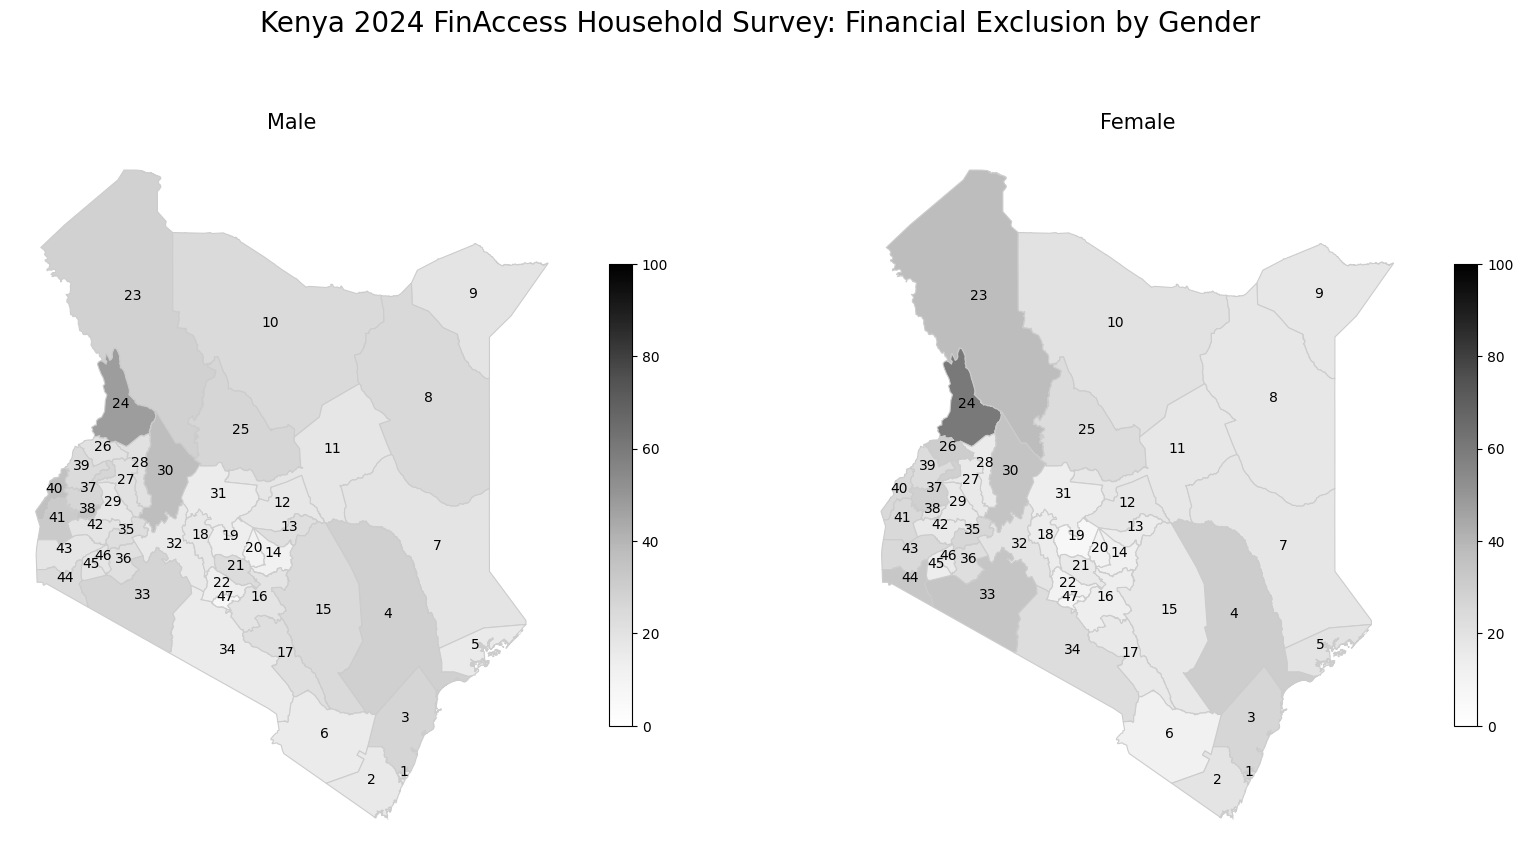

In [43]:
# Merge summary statistics with map data
kenya_map3 = county_map.merge(sex_subset_finaccess, how='left', left_on='COUNTY_ID', right_on='county')

# Set-up grid for maps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the map for Male account ownership exclusion
mask_male = (kenya_map3['sex_labelled'] == 'Male')
kenya_map3[mask_male].plot(
    column='account_ownership_excl',
    cmap='Greys',
    linewidth=0.8,
    ax=axes[0],  # First subplot for Male
    vmin=0,
    vmax=100,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'shrink': 0.6}
)

# Add county numbers to the map (for Male)
for idx, row in kenya_map3.iterrows():
    if row['sex_labelled'] == 'Male':  # Ensure it only adds for Male
        x, y = row['geometry'].centroid.coords[0]
        axes[0].text(x, y, str(row['COUNTY_ID']), fontsize=10, ha='center', color='black')

# Add title and remove axis for Male
axes[0].set_title('Male', fontdict={'fontsize': 15})
axes[0].axis('off')

# Plot the map for Female account ownership exclusion
mask_female = (kenya_map3['sex_labelled'] == 'Female')
kenya_map3[mask_female].plot(
    column='account_ownership_excl',
    cmap='Greys',
    linewidth=0.8,
    ax=axes[1],  # Second subplot for Female
    vmin=0,
    vmax=100,
    edgecolor='0.8',
    legend=True,
    legend_kwds={'shrink': 0.6}
)

# Add county numbers to the map (for Female)
for idx, row in kenya_map3.iterrows():
    if row['sex_labelled'] == 'Female':  # Ensure it only adds for Female
        x, y = row['geometry'].centroid.coords[0]
        axes[1].text(x, y, str(row['COUNTY_ID']), fontsize=10, ha='center', color='black')

# Add title and remove axis for Female
axes[1].set_title('Female', fontdict={'fontsize': 15})
axes[1].axis('off')

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Financial Exclusion by Gender', fontsize=20)

# Save to file
plt.savefig("finaccess_exclusion_by_gender.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

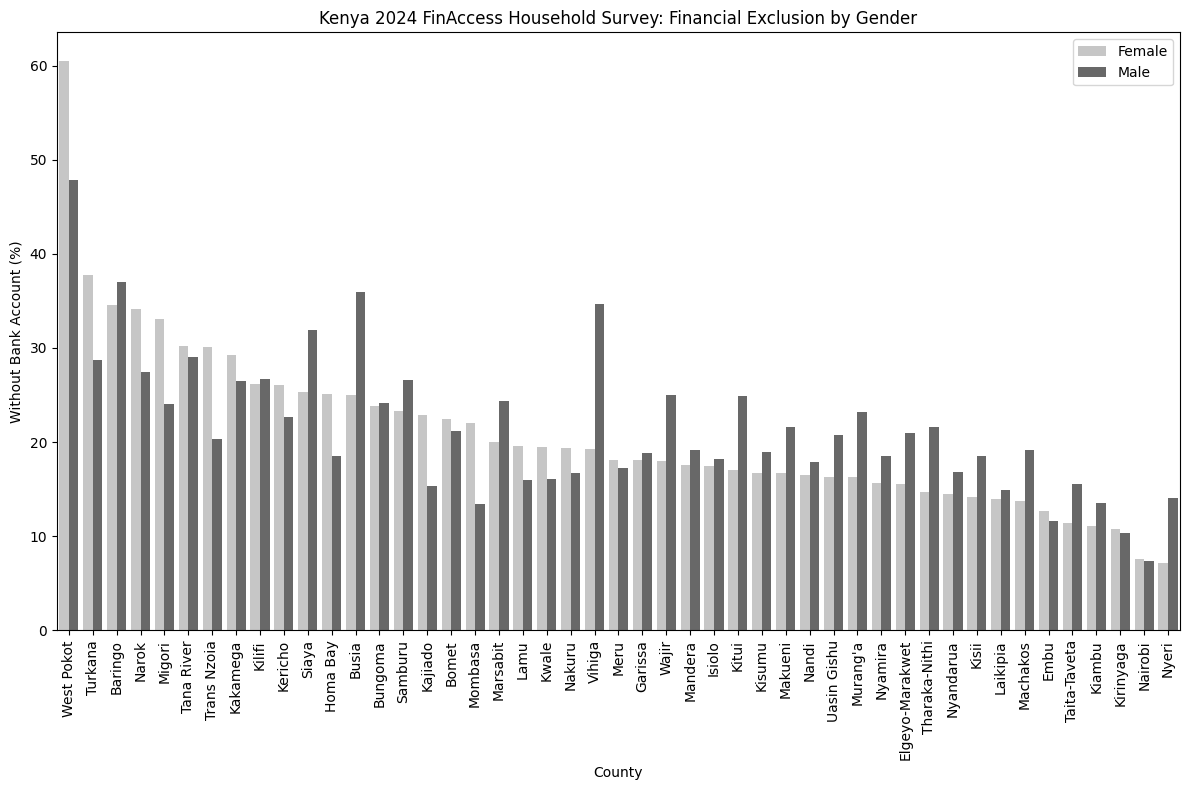

   sex_labelled  account_ownership_excl
36       Female                7.168459
37         Male               14.044944
   sex_labelled  account_ownership_excl
46       Female               60.504202
47         Male               47.794118


In [47]:
# Merge sex_subset_finaccess with subset_census_data to get the county names
sex_subset_finaccess = sex_subset_finaccess.merge(
    subset_census_data[['County_code', 'County']], 
    left_on='county', 
    right_on='County_code', 
    how='left'
)

# Sort the female data by exclusion
female_sorted = sex_subset_finaccess[sex_subset_finaccess['sex_labelled'] == 'Female'] \
    .sort_values(by='account_ownership_excl', ascending=False)

# Get the county order from the sorted female data
county_order = female_sorted['County'].tolist()

# Convert 'County_name' in the full dataset to an ordered categorical type using the above order
sex_subset_finaccess['County'] = pd.Categorical(
    sex_subset_finaccess['County'],
    categories=county_order,
    ordered=True
)

# Create the figure
plt.figure(figsize=(12, 8))

# Plot the bar chart with 'County_name' on the x-axis
sns.barplot(
    data=sex_subset_finaccess,
    x='County',
    y='account_ownership_excl',
    hue='sex_labelled',
    palette='Greys'
)

plt.legend(title=None)
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Without Bank Account (%)')
plt.title('Kenya 2024 FinAccess Household Survey: Financial Exclusion by Gender')
plt.tight_layout()

# Save to file
plt.savefig("finaccess_exclusion_by_gender2.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Example outputs for specific counties (if needed)
print(sex_subset_finaccess[(sex_subset_finaccess['County'] == 'Nyeri')][['sex_labelled', 'account_ownership_excl']])
print(sex_subset_finaccess[(sex_subset_finaccess['County'] == 'West Pokot')][['sex_labelled', 'account_ownership_excl']])

We observe significant variation across counties between financial exclusion and gender. In West Pokot, exclusion is highest among women, with 60.5% lacking a bank account compared to 47.8% of men. Conversely, in Nyeri, exclusion is lowest among women, with just 7.1% without a bank account, compared to 14.0% of men.

These differences may reflect cultural or socio-economic factors in rural life, and warrant further investigation.

We next explore correlations between key indicators of financial inclusion to better understand how different aspects of access and usage relate to one another.

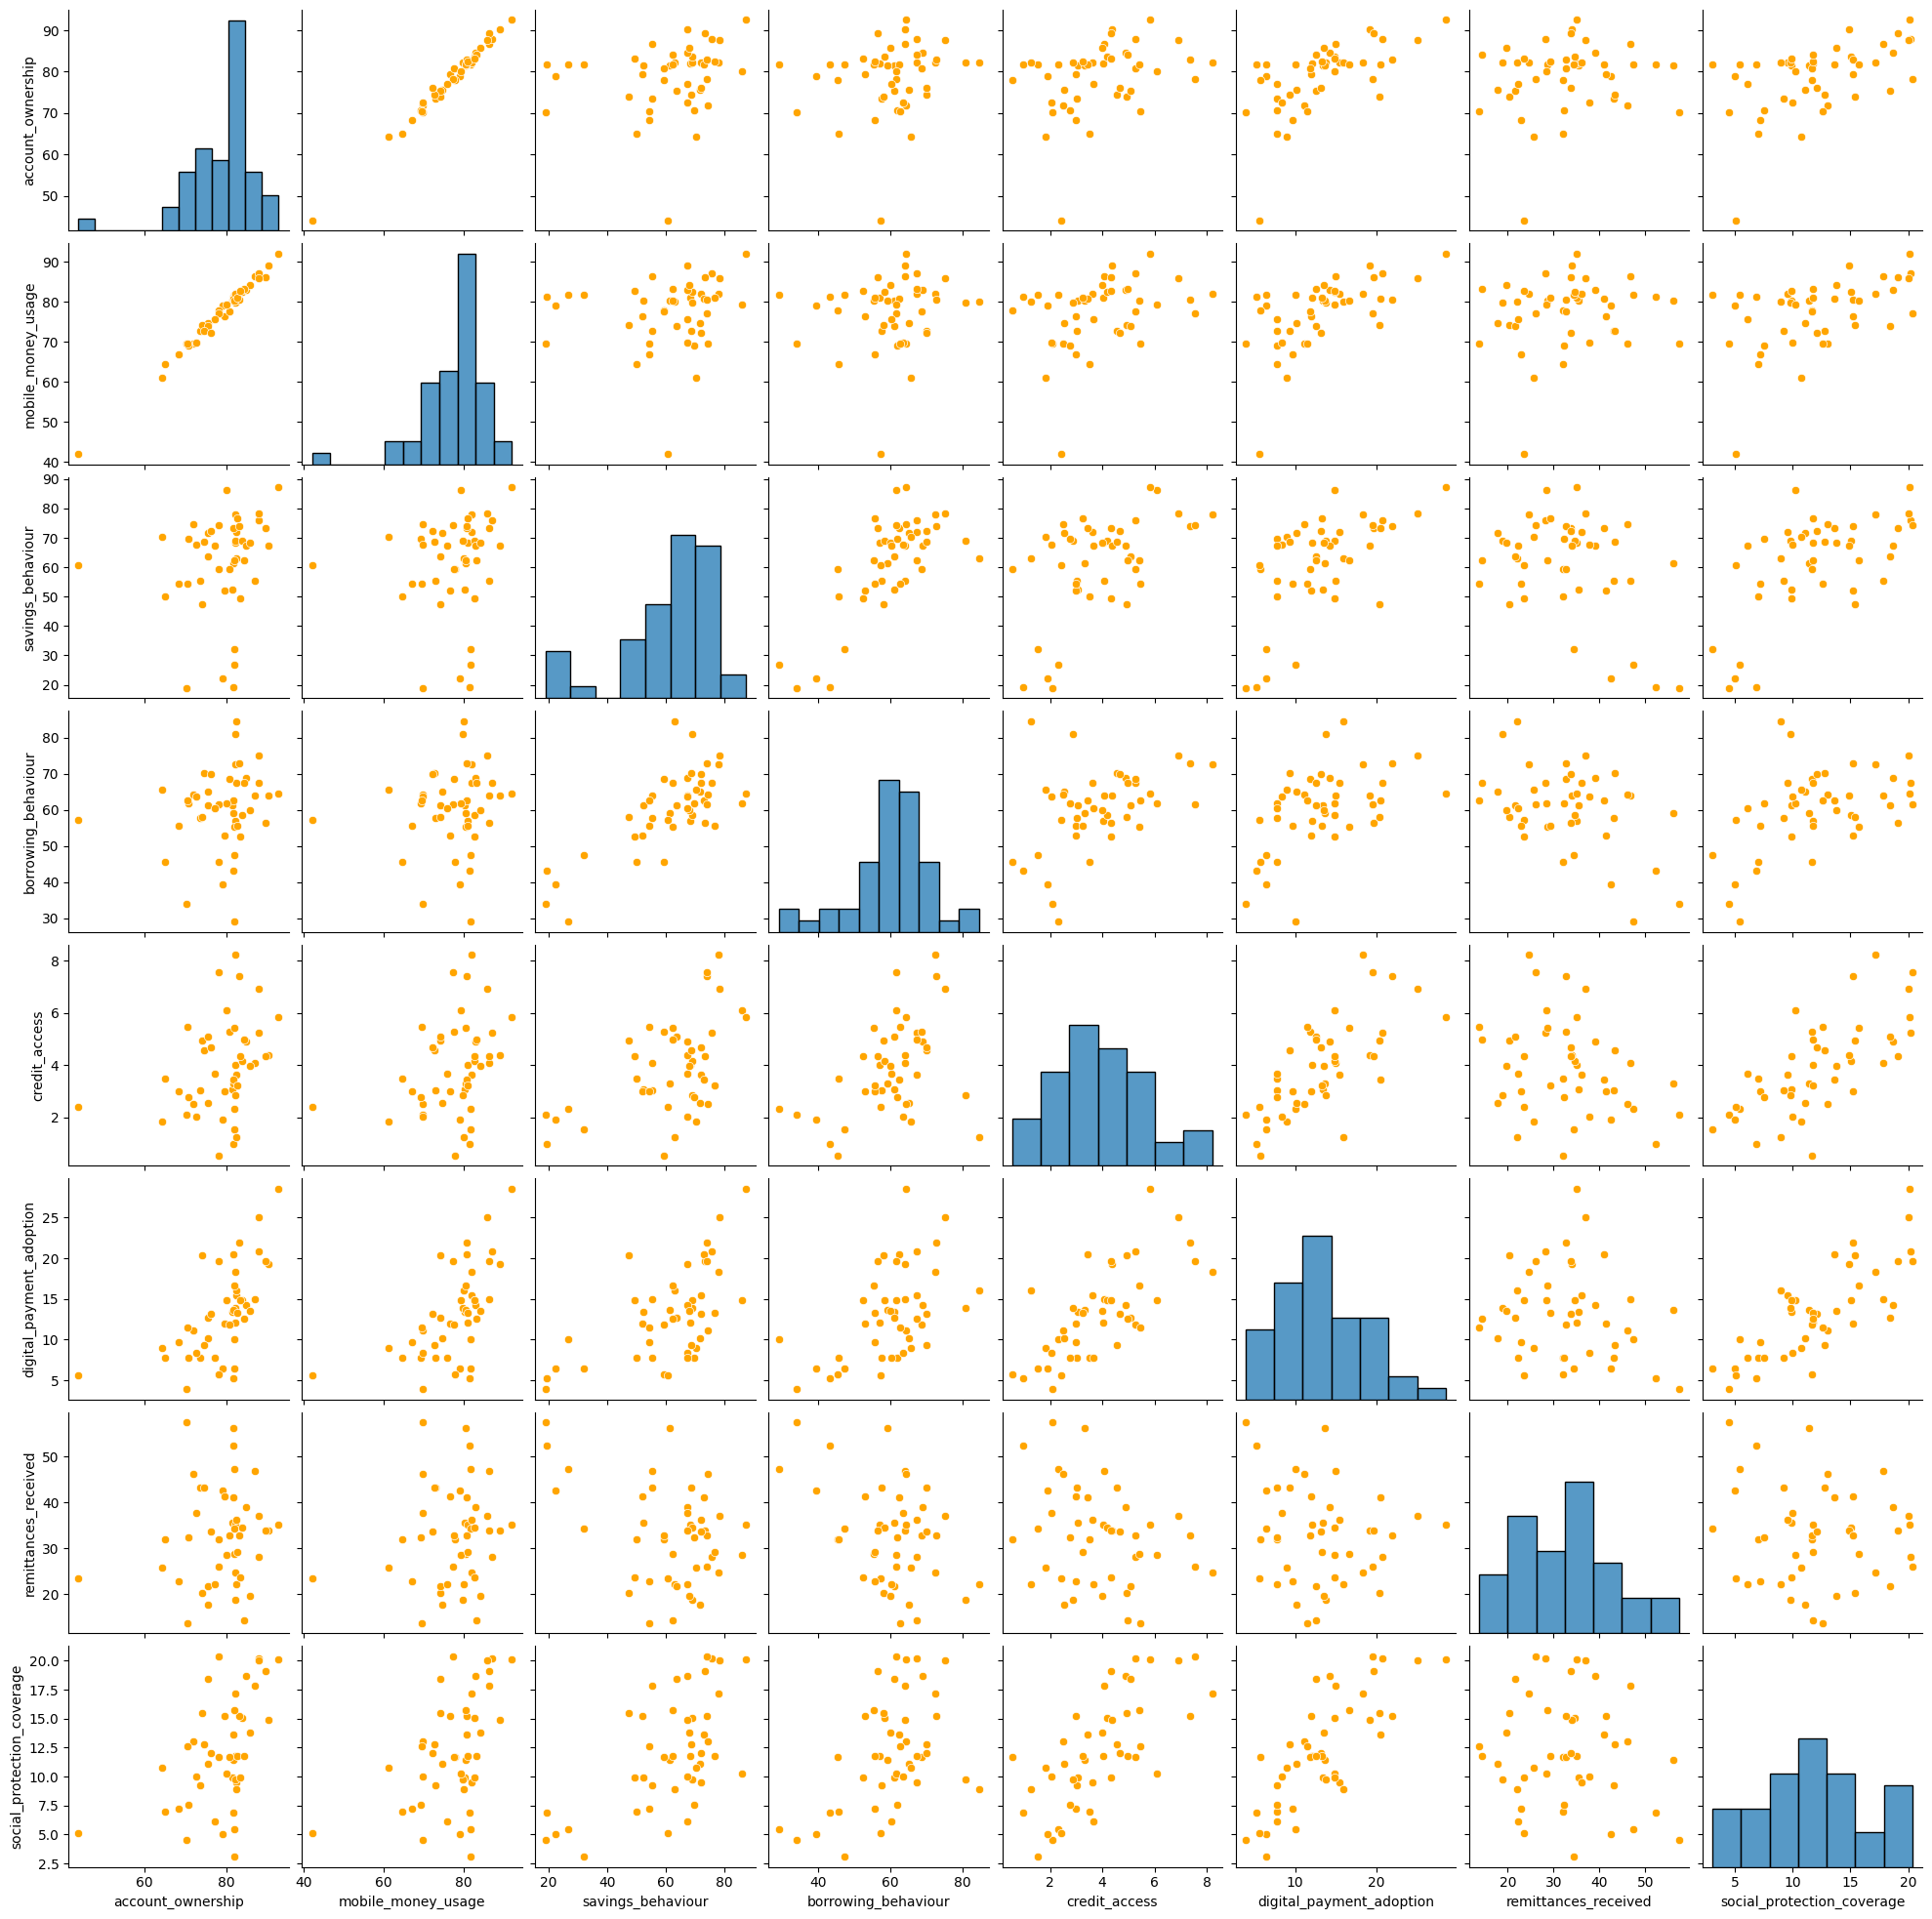

In [48]:
# Create pairwise scatterplots of continuous variables
sns.pairplot(finaccess_merged_summary[[
                   'account_ownership',
                   'mobile_money_usage',
                   'savings_behaviour',
                   'borrowing_behaviour',
                   'credit_access',
                   'digital_payment_adoption',
                   'remittances_received',
                   'social_protection_coverage']],
             plot_kws={'color': 'orange'})

# Save to file
plt.savefig("finaccess_inclusion_correlations.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

We observe a strong correlation between bank account ownership and mobile money usage — likely because mobile money constitutes the dominant form of account ownership. Similarly, savings and borrowing behaviours are also notably correlated, suggesting linked patterns of financial activity.

### 3.3 Economic Opportunity

We create choropleth maps to visualise key metrics of economic opportunity across counties.

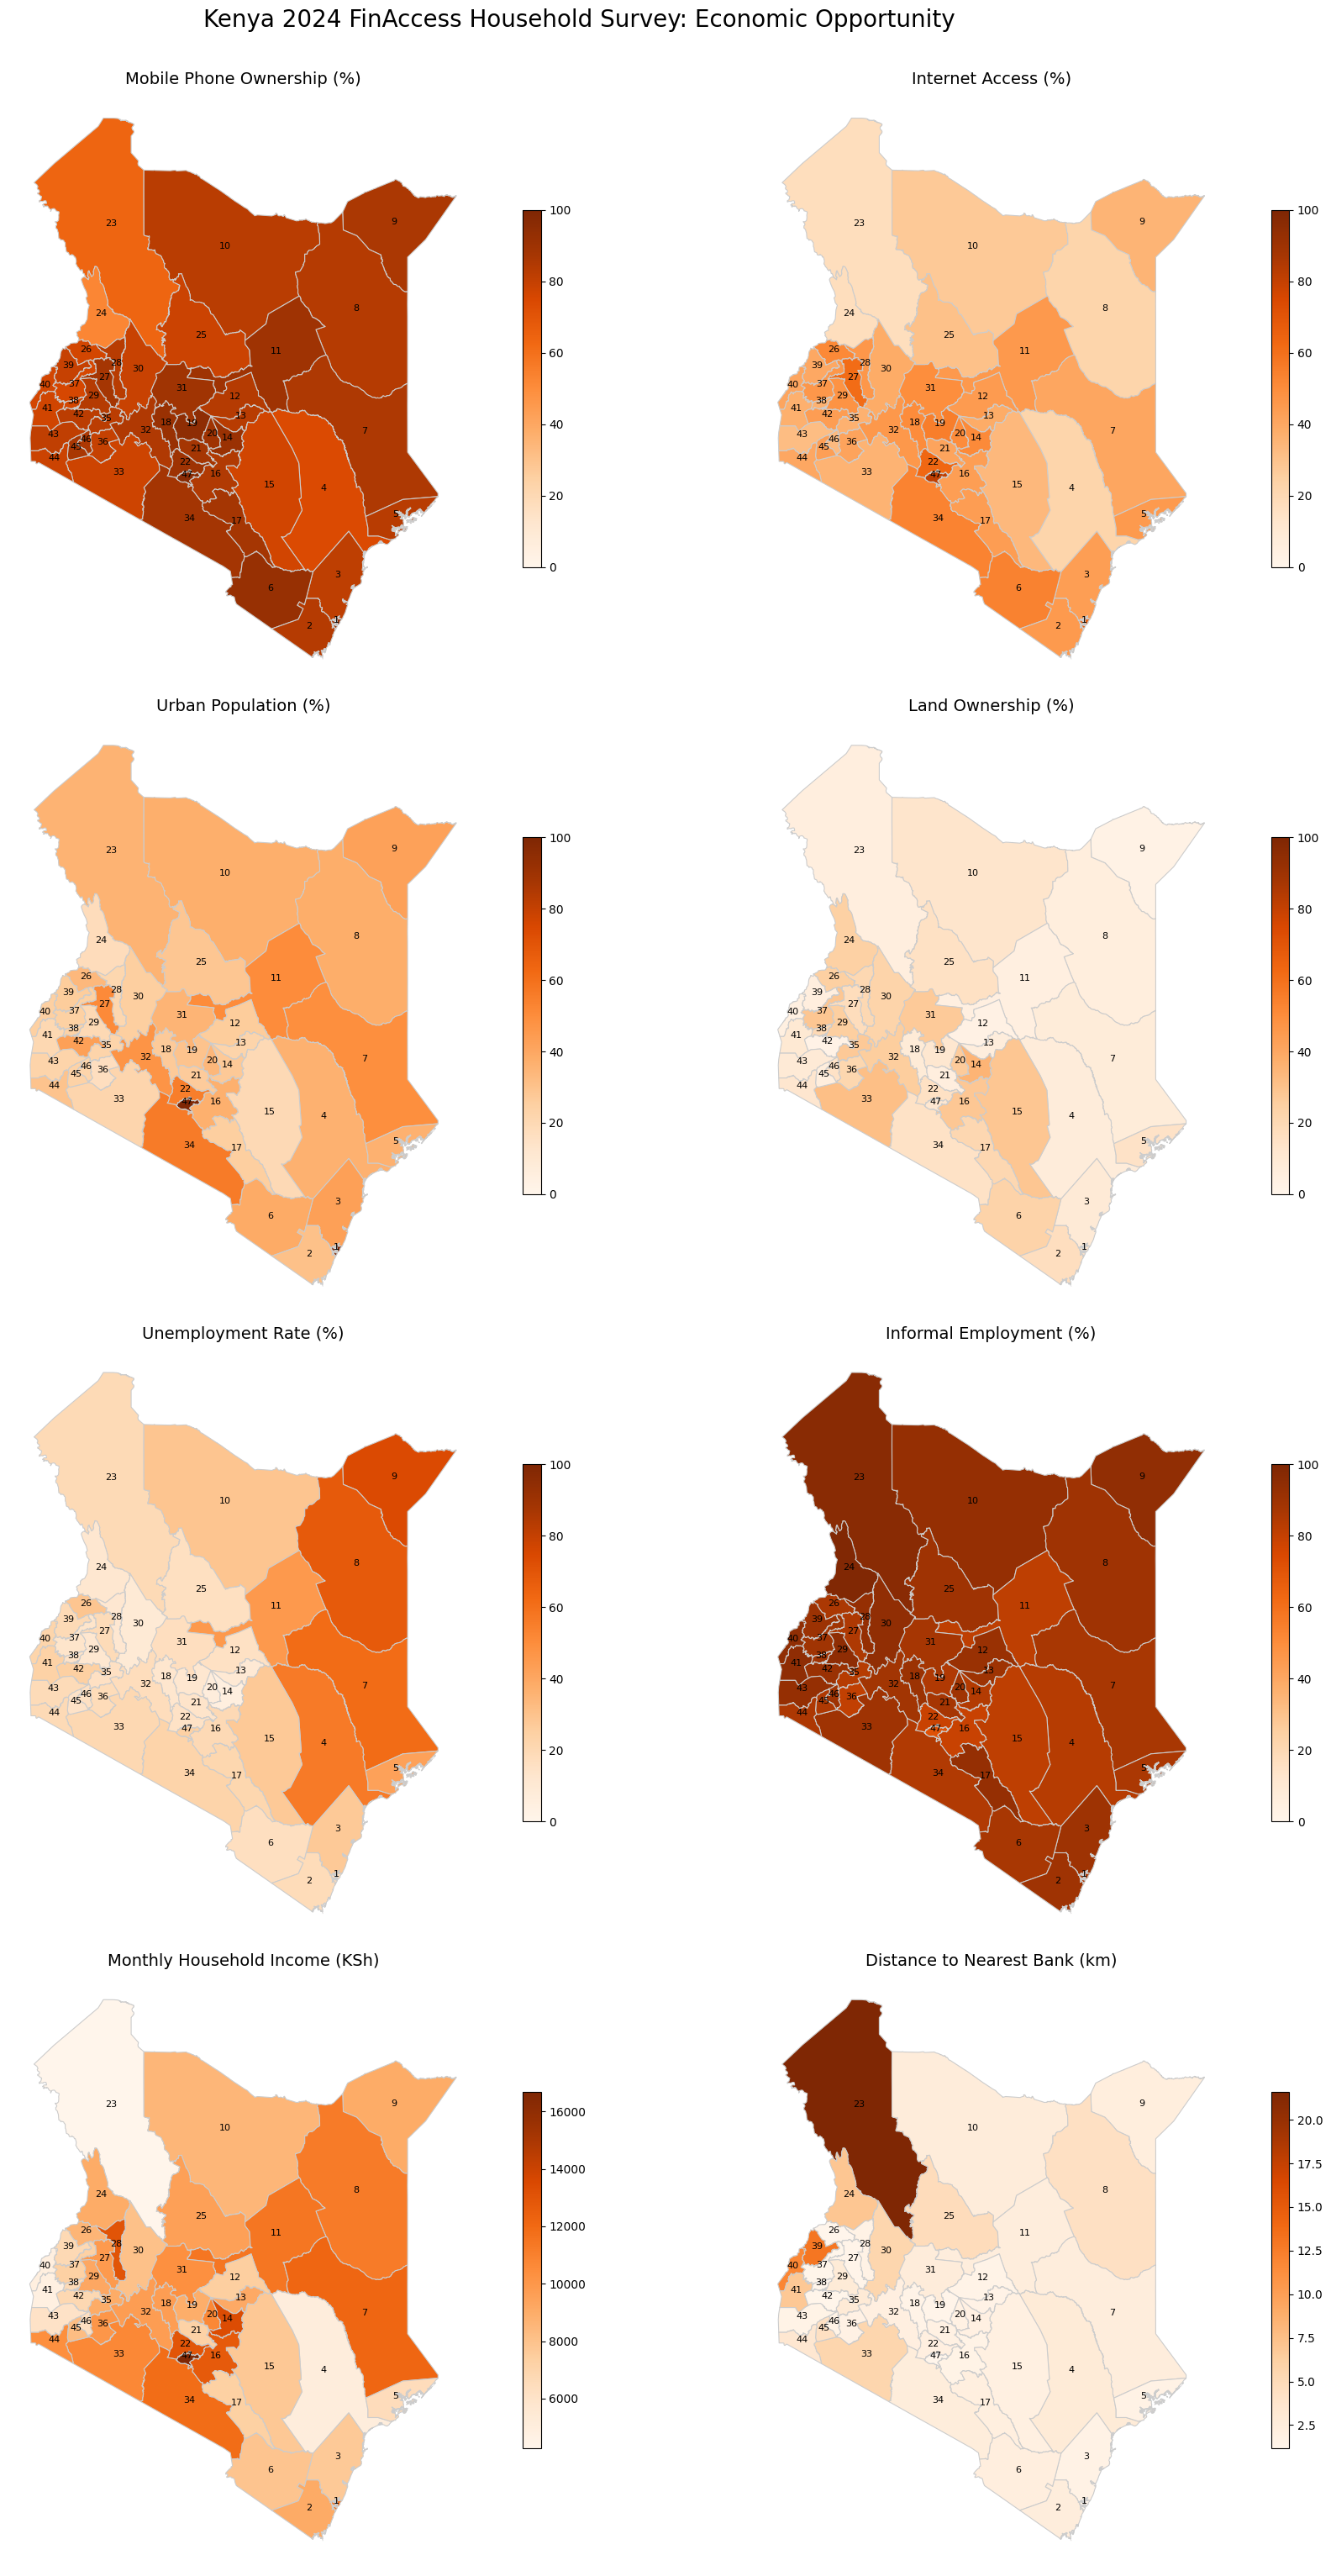

In [49]:
# Set-up grid for maps
fig, axes = plt.subplots(4, 2, figsize=(20, 30))  # 4 rows, 2 columns

# Plot % variables
# Flatten axes for easy looping
axes = axes.flatten()

# List of columns to plot
columns_to_plot2 = ['mobile_phone_ownership',
                   'internet_access',
                   'urban_population',
                   'land_ownership',
                   'unemployment_rate',
                   'informal_employment']

titles = ['Mobile Phone Ownership (%)',
          'Internet Access (%)',
          'Urban Population (%)',
          'Land Ownership (%)',
          'Unemployment Rate (%)',
          'Informal Employment (%)']

for i, col in enumerate(columns_to_plot2):
    kenya_map.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i],
        edgecolor='0.8',
        vmin=0,
        vmax=100,
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i].axis('off')

# Plot non-% variables
# List of additional columns to plot
columns_to_plot3 = ['monthly_household_income',
                   'distance_to_nearest_bank',]

titles = ['Monthly Household Income (KSh)',
          'Distance to Nearest Bank (km)']

for i, col in enumerate(columns_to_plot3):
    kenya_map.plot(
        column=col,
        cmap='Oranges',
        linewidth=0.8,
        ax=axes[i+6],
        edgecolor='0.8',
        legend=True,
        legend_kwds={'shrink': 0.6}
    )
    
    # Add county numbers
    for idx, row in kenya_map.iterrows():
        x, y = row['geometry'].centroid.coords[0]
        axes[i+6].text(x, y, str(row['COUNTY_ID']), fontsize=8, ha='center', color='black')

    # Style each subplot
    axes[i+6].set_title(titles[i], fontdict={'fontsize': 14})
    axes[i+6].axis('off')

# Adjust layout
plt.tight_layout()

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Economic Opportunity', fontsize=20, y=1.02)

# Save to file
plt.savefig("finaccess_economic_opportunity.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

In [50]:
# Descriptive statistics
kenya_map[columns_to_plot2 + columns_to_plot3].describe()

mobile_phone_ownership  internet_access  urban_population  \
count               47.000000        47.000000         47.000000   
mean                82.934892        42.773021         34.750559   
std                  7.630699        12.044861         17.227990   
min                 52.406417        17.250000         17.169811   
25%                 78.707662        36.402022         24.001322   
50%                 83.673469        43.452381         29.755179   
75%                 87.862876        48.878835         38.245553   
max                 96.753247        81.168831        100.000000   

       land_ownership  unemployment_rate  informal_employment  \
count       47.000000          47.000000            47.000000   
mean        15.841662          22.731683            88.216421   
std          9.060408          15.212081             5.168543   
min          2.471483           5.378973            71.777778   
25%          7.675322          14.440761            85.438227   
50%         14.906832          18.689320            89.189189   
75%         23.877073          24.192767            91.383764   
max         35.504202          74.074074            99.003322   

       monthly_household_income  distance_to_nearest_bank  
count                 47.000000                 47.000000  
mean                9069.502271                  3.385683  
std                 2553.038782                  3.678856  
min                 4255.525000                  1.150342  
25%                 7310.488862                  1.583333  
50%                 9041.314856                  2.183178  
75%                10556.491764                  3.016097  
max                16695.373377                 21.615000

In [51]:
# Extract top and bottom counties by mobile phone ownership
print(kenya_map[['COUNTY', 'county', 'mobile_phone_ownership']].sort_values(by='mobile_phone_ownership', ascending=False).head(3).to_string(index=False))
print(kenya_map[['COUNTY', 'county', 'mobile_phone_ownership']].sort_values(by='mobile_phone_ownership', ascending=False).tail(3).to_string(index=False))
print()

# Extract top and bottom counties by internet access
print(kenya_map[['COUNTY', 'county', 'internet_access']].sort_values(by='internet_access', ascending=False).head(3).to_string(index=False))
print()
print(kenya_map[['COUNTY', 'county', 'internet_access']].sort_values(by='internet_access', ascending=False).tail(3).to_string(index=False))
print()

      COUNTY  county  mobile_phone_ownership
     Nairobi      47               96.753247
       Nyeri      19               95.185996
Taita Taveta       6               91.857506
    COUNTY  county  mobile_phone_ownership
Tana River       4               74.174174
   Turkana      23               64.000000
West Pokot      24               52.406417

 COUNTY  county  internet_access
Nairobi      47        81.168831
Mombasa       1        67.058824
 Kiambu      22        62.990654

    COUNTY  county  internet_access
     Wajir       8        22.488038
West Pokot      24        17.379679
   Turkana      23        17.250000



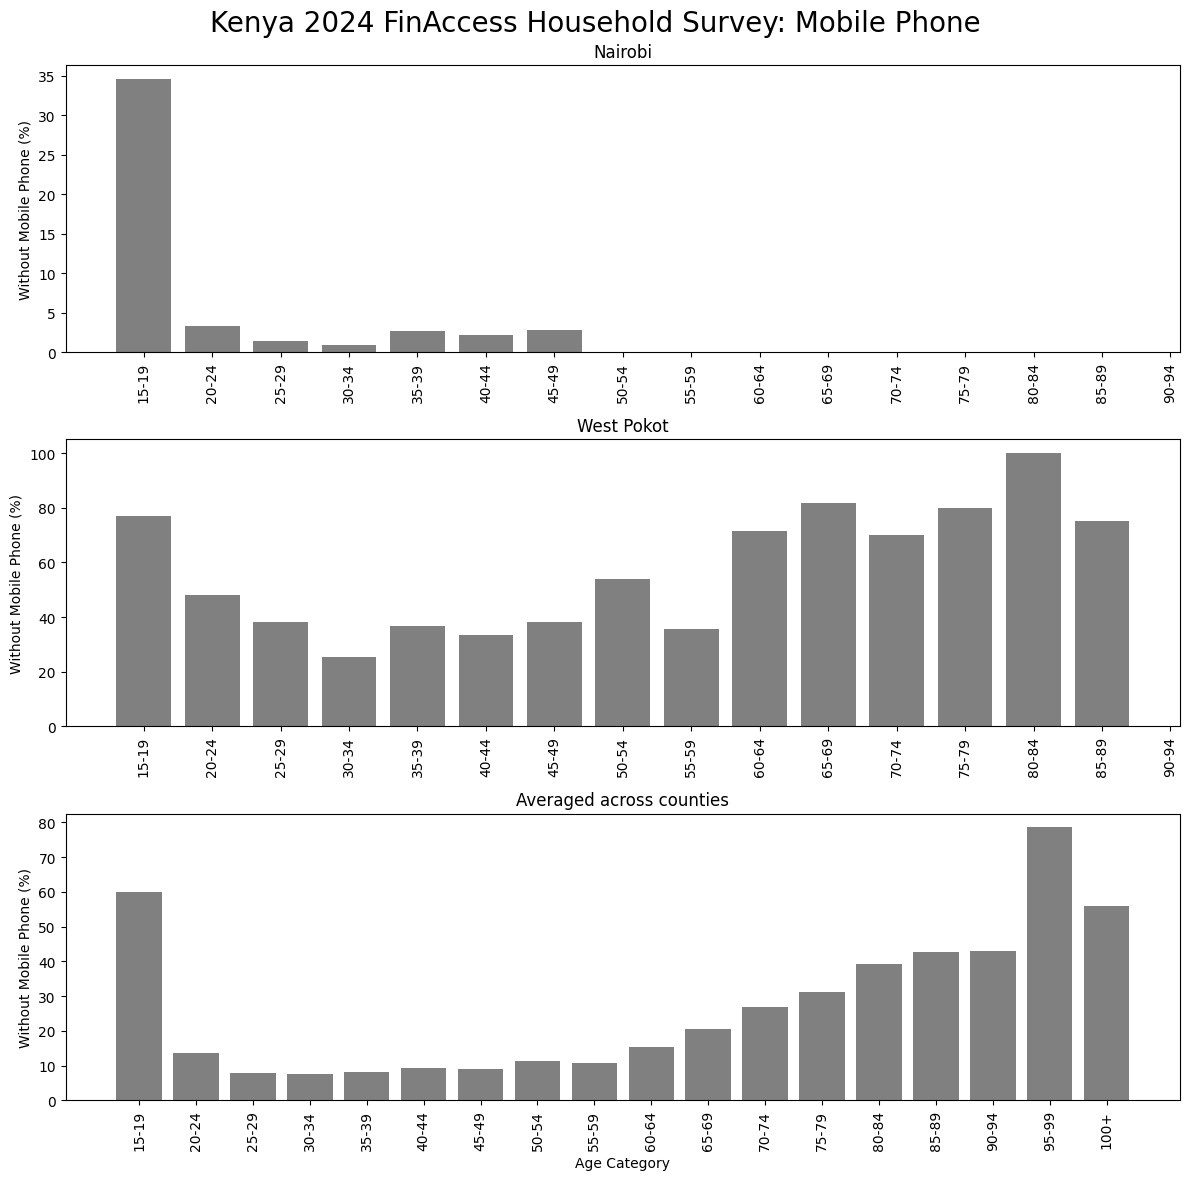

age_category  mobile_phone_excl
0        15-19          59.990955
1        20-24          13.726452
2        25-29           7.918973
3        30-34           7.683573
4        35-39           8.181253

In [54]:
# Create the figure
plt.figure(figsize=(12, 12))

# Plot the first bar chart
plt.subplot(3, 1, 1)
plt.bar(age_profile_Nairobi_finaccess['age_category'], age_profile_Nairobi_finaccess['mobile_phone_excl'], color='grey')
plt.xlabel('')
plt.ylabel('Without Mobile Phone (%)')
plt.xticks(rotation=90)
plt.title('Nairobi')

# Plot the second bar chart
plt.subplot(3, 1, 2)
plt.bar(age_profile_WP_finaccess['age_category'], age_profile_WP_finaccess['mobile_phone_excl'], color='grey')
plt.xlabel('')
plt.ylabel('Without Mobile Phone (%)')
plt.xticks(rotation=90)
plt.title('West Pokot')

# Averaged across counties data
age_profile_av_county_finaccess = age_profile_subset_finaccess.groupby('age_category', observed=False)['mobile_phone_excl'].mean().reset_index()

# Plot the third bar chart
plt.subplot(3, 1, 3)
plt.bar(age_profile_av_county_finaccess['age_category'], age_profile_av_county_finaccess['mobile_phone_excl'], color='grey')
plt.xlabel('Age Category')
plt.ylabel('Without Mobile Phone (%)')
plt.xticks(rotation=90)
plt.title('Averaged across counties')

# Add overall title
plt.suptitle('Kenya 2024 FinAccess Household Survey: Mobile Phone', fontsize=20)

# Adjust layout
plt.tight_layout()

# Save to file
plt.savefig("finaccess_mobile_phone_by_age.png", dpi=300, bbox_inches='tight')

# Show plots
plt.show()

age_profile_av_county_finaccess.head()

Mobile phone ownership is generally high across Kenya, with the highest rate in Nairobi (96.8%) and the lowest in West Pokot (52.4%), and a county-level mean of 82.9%. However, there are notable disparities — for example, 60% of youths aged 15–19 do not own a mobile phone.

Internet access is more unevenly distributed, ranging from 81.2% in Nairobi to just 17.3% in Turkana, with a county-level mean of 42.8%.

### 3.3 Correlations

We use scatterplots to examine potential correlations between key indicators of financial inclusion and selected measures of economic opportunity.

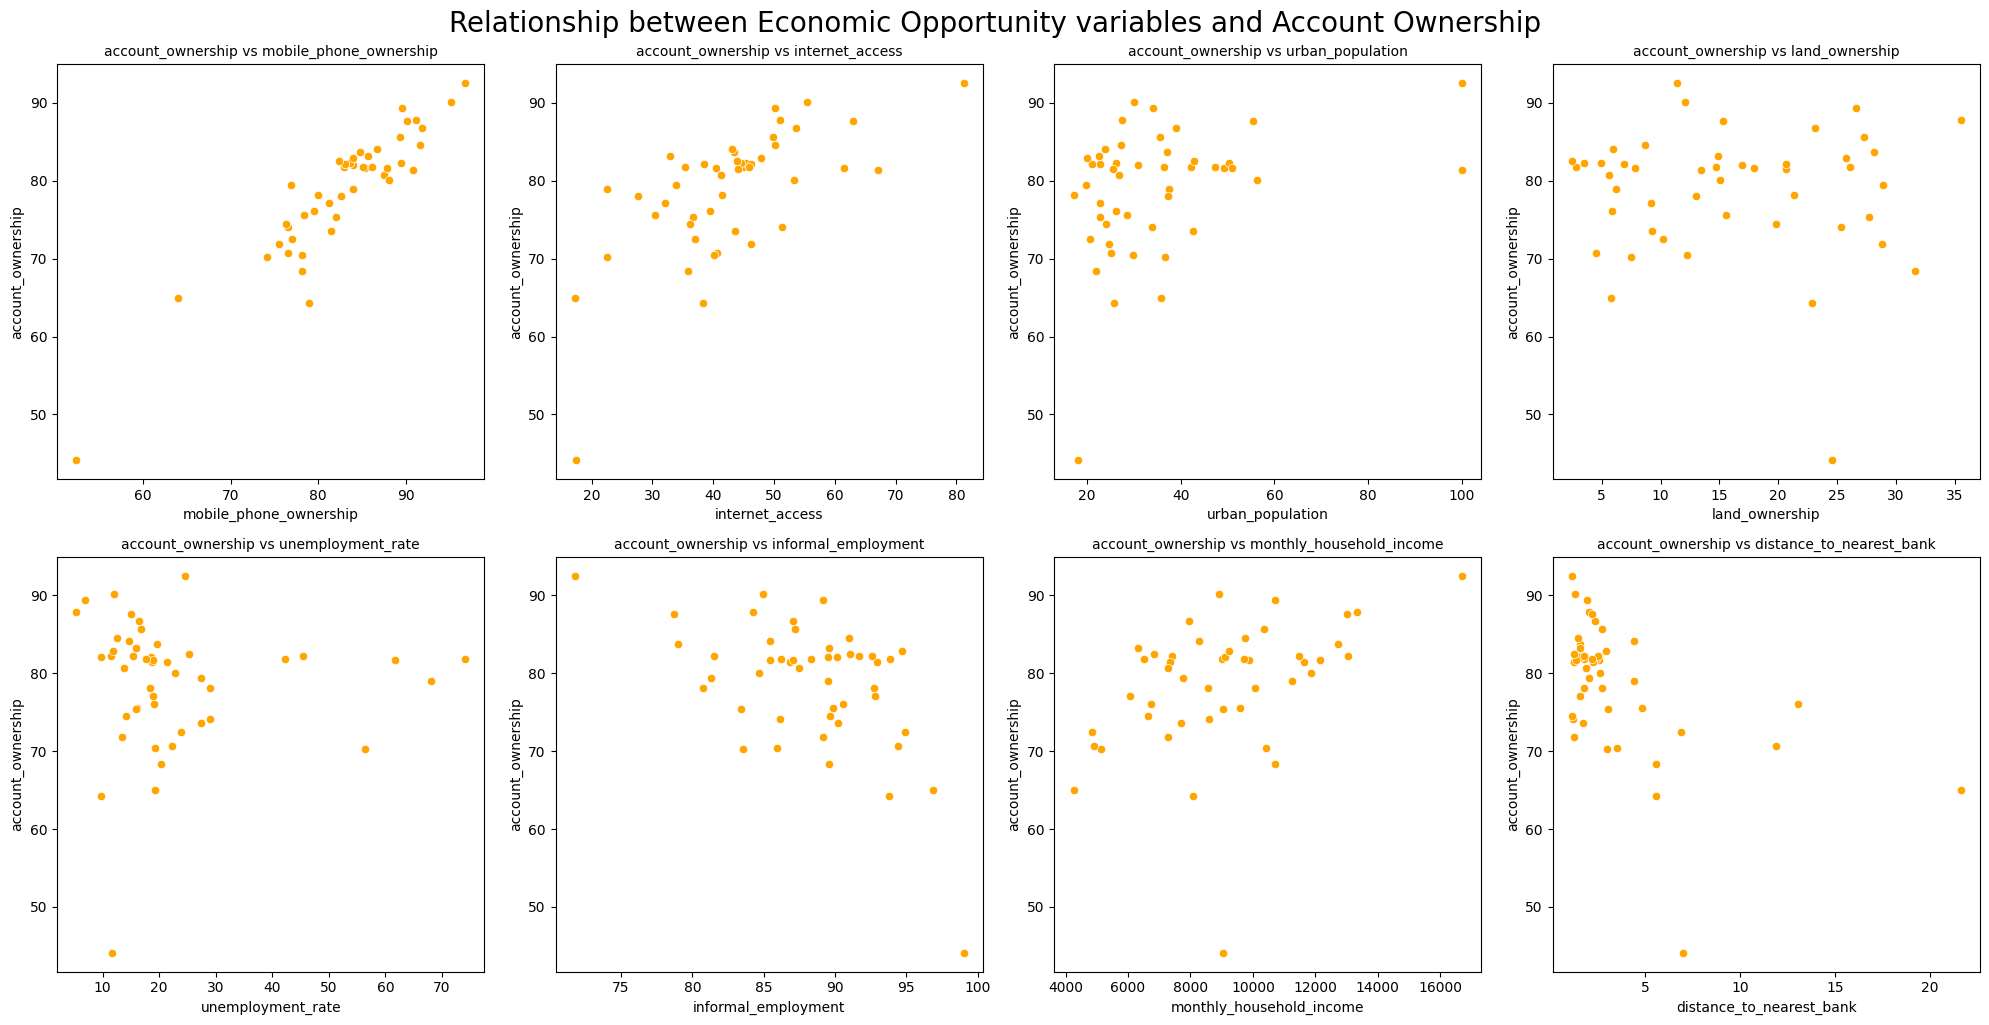

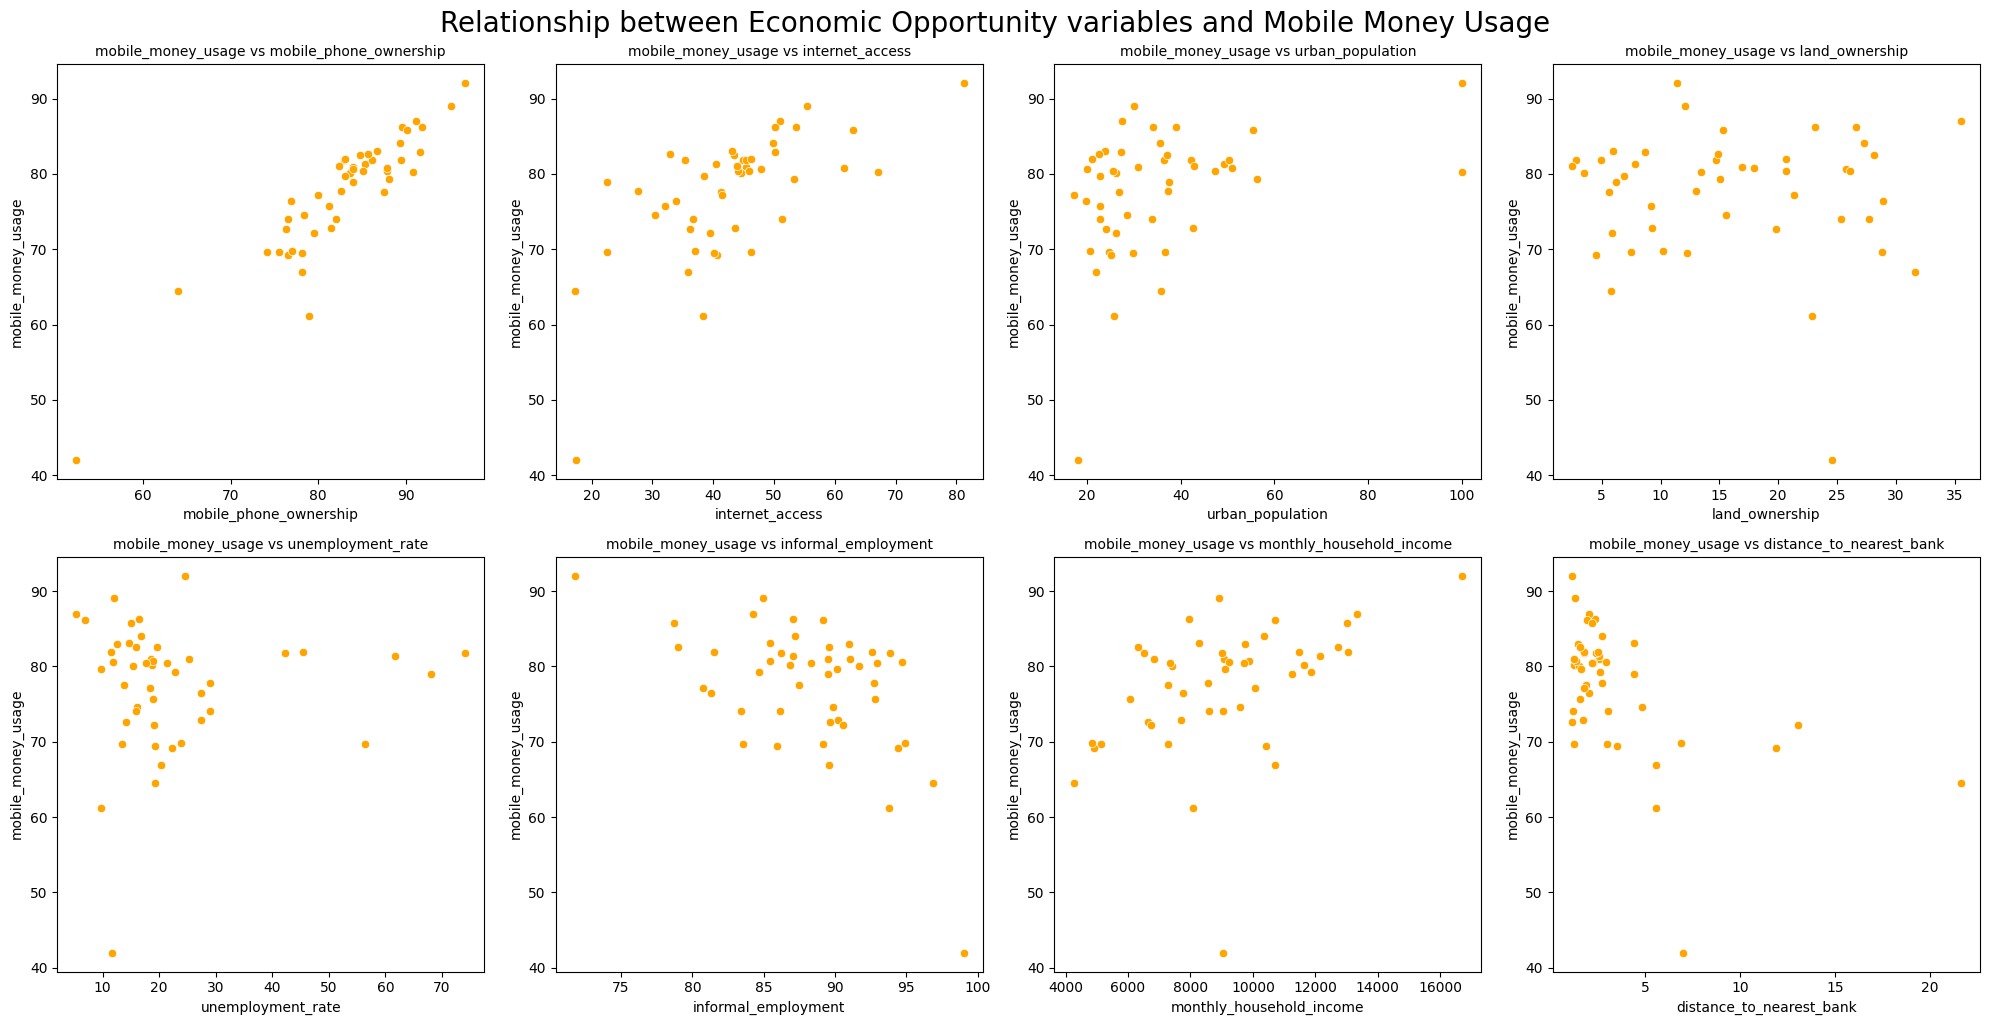

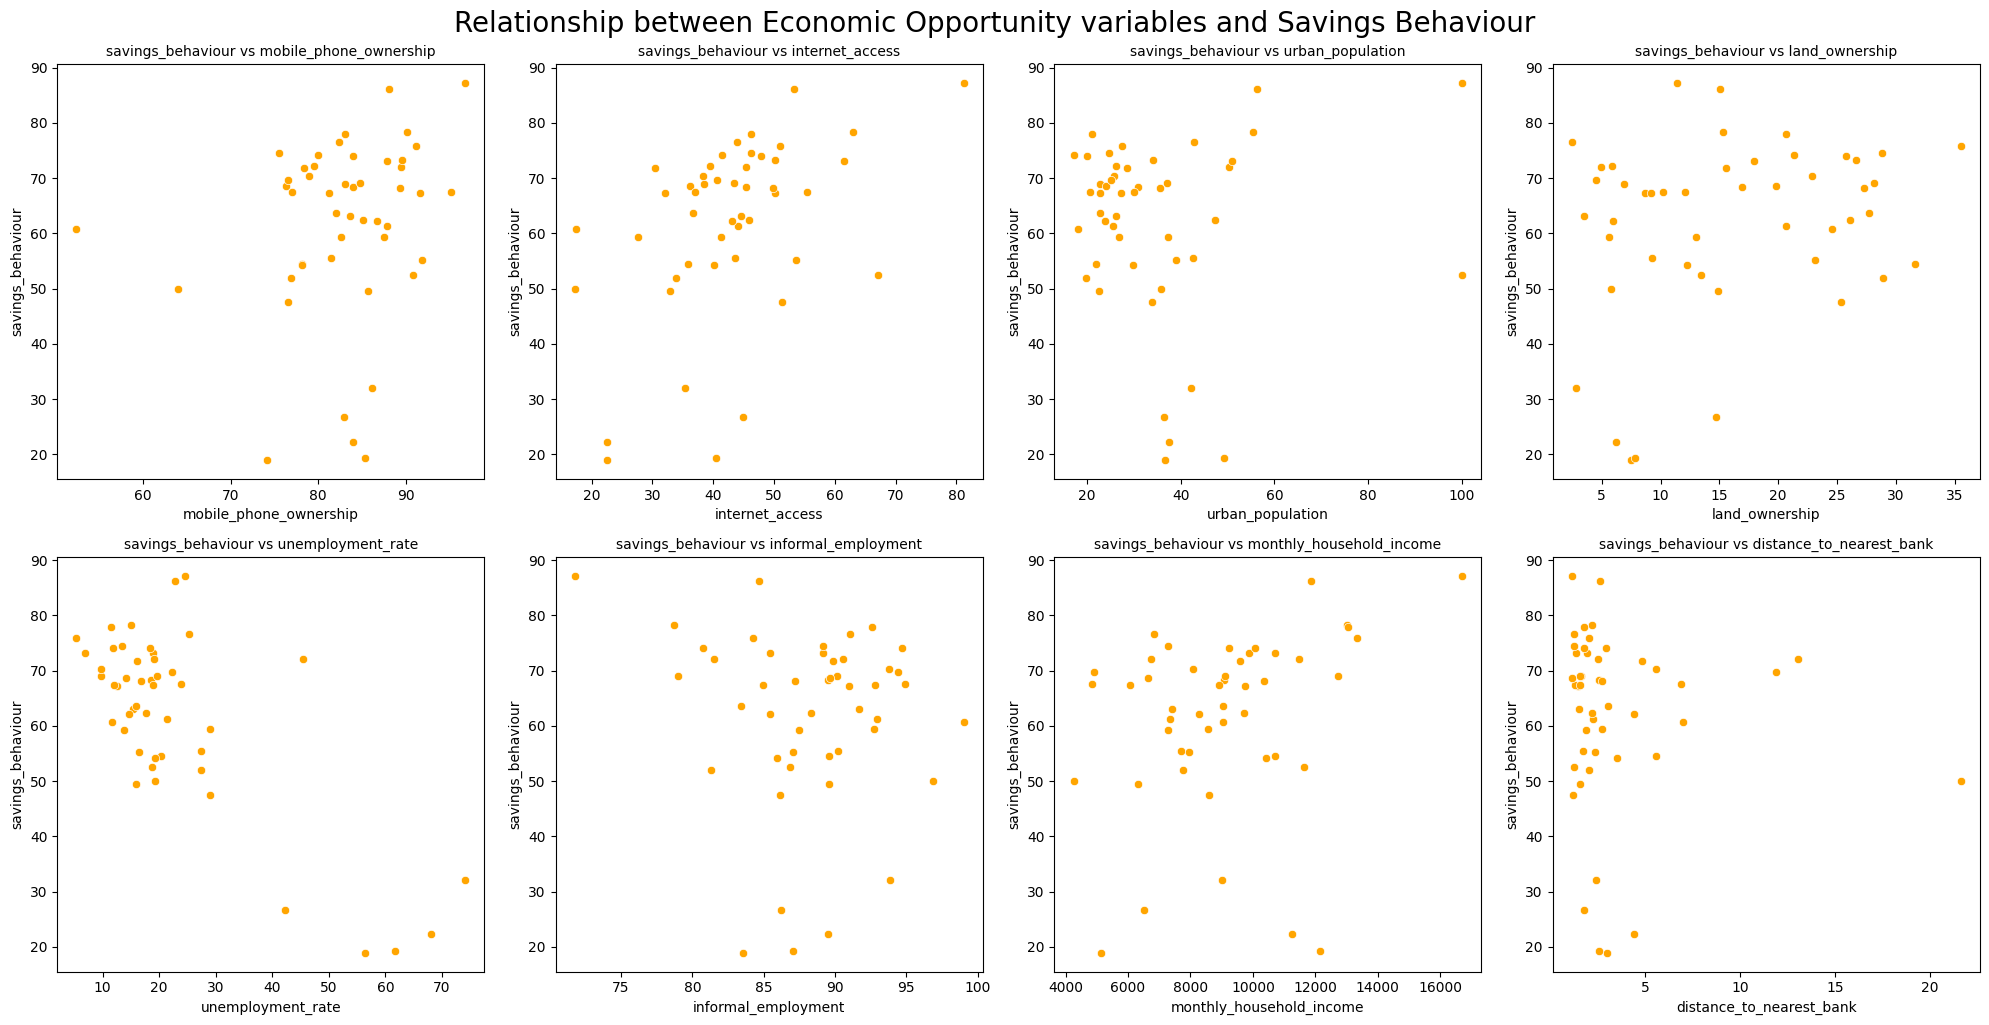

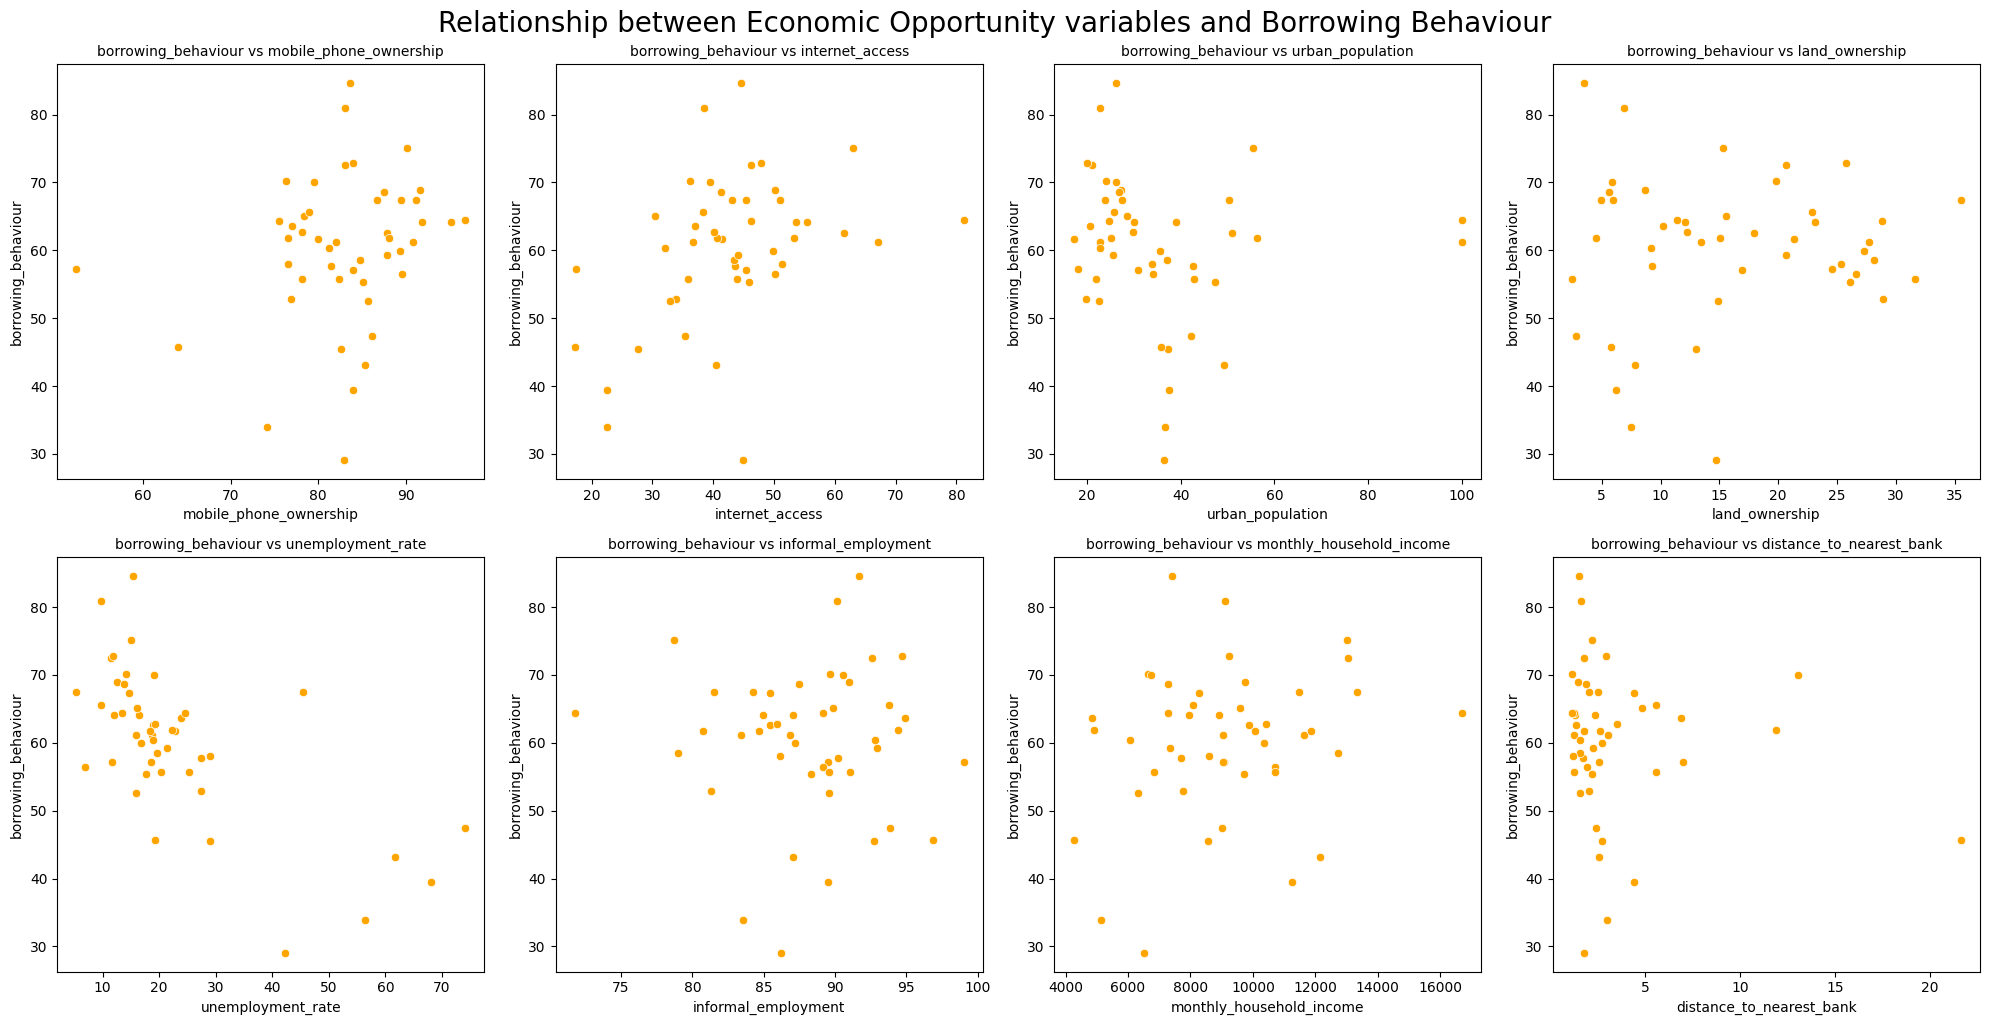

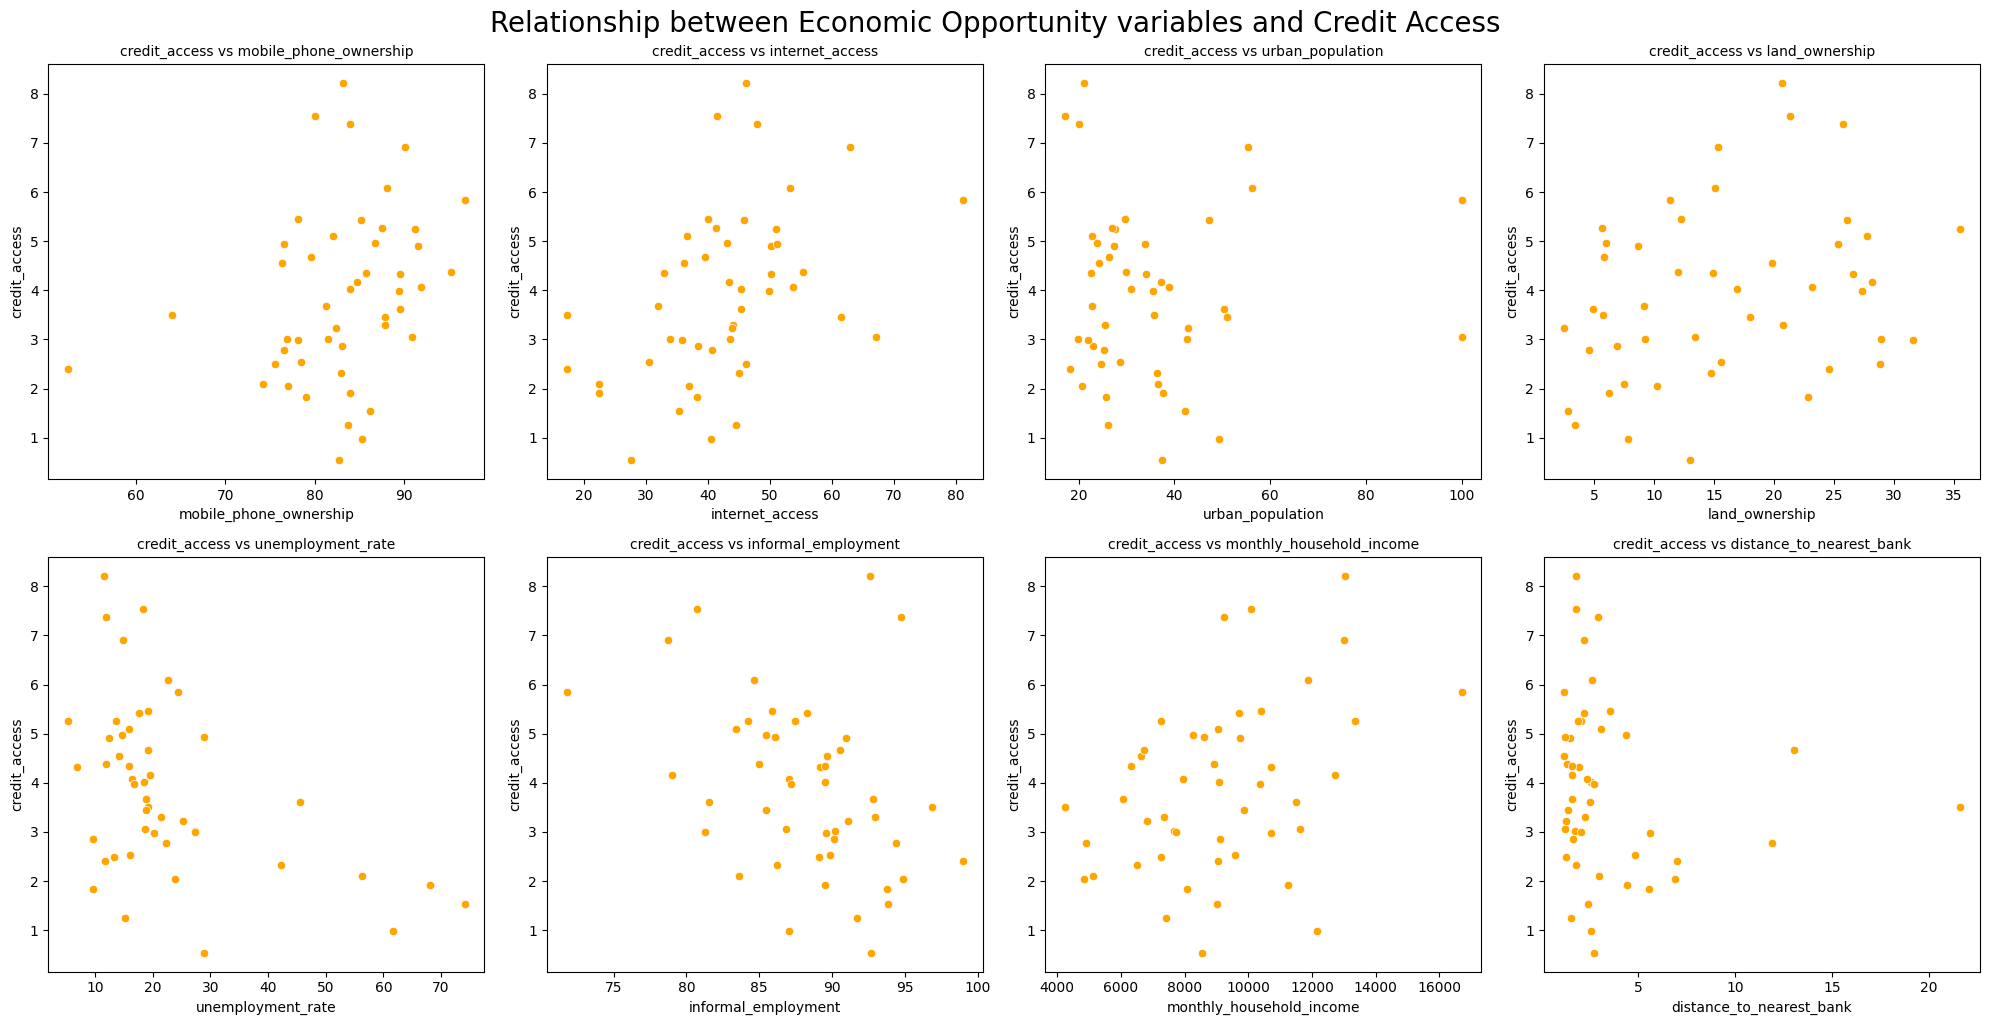

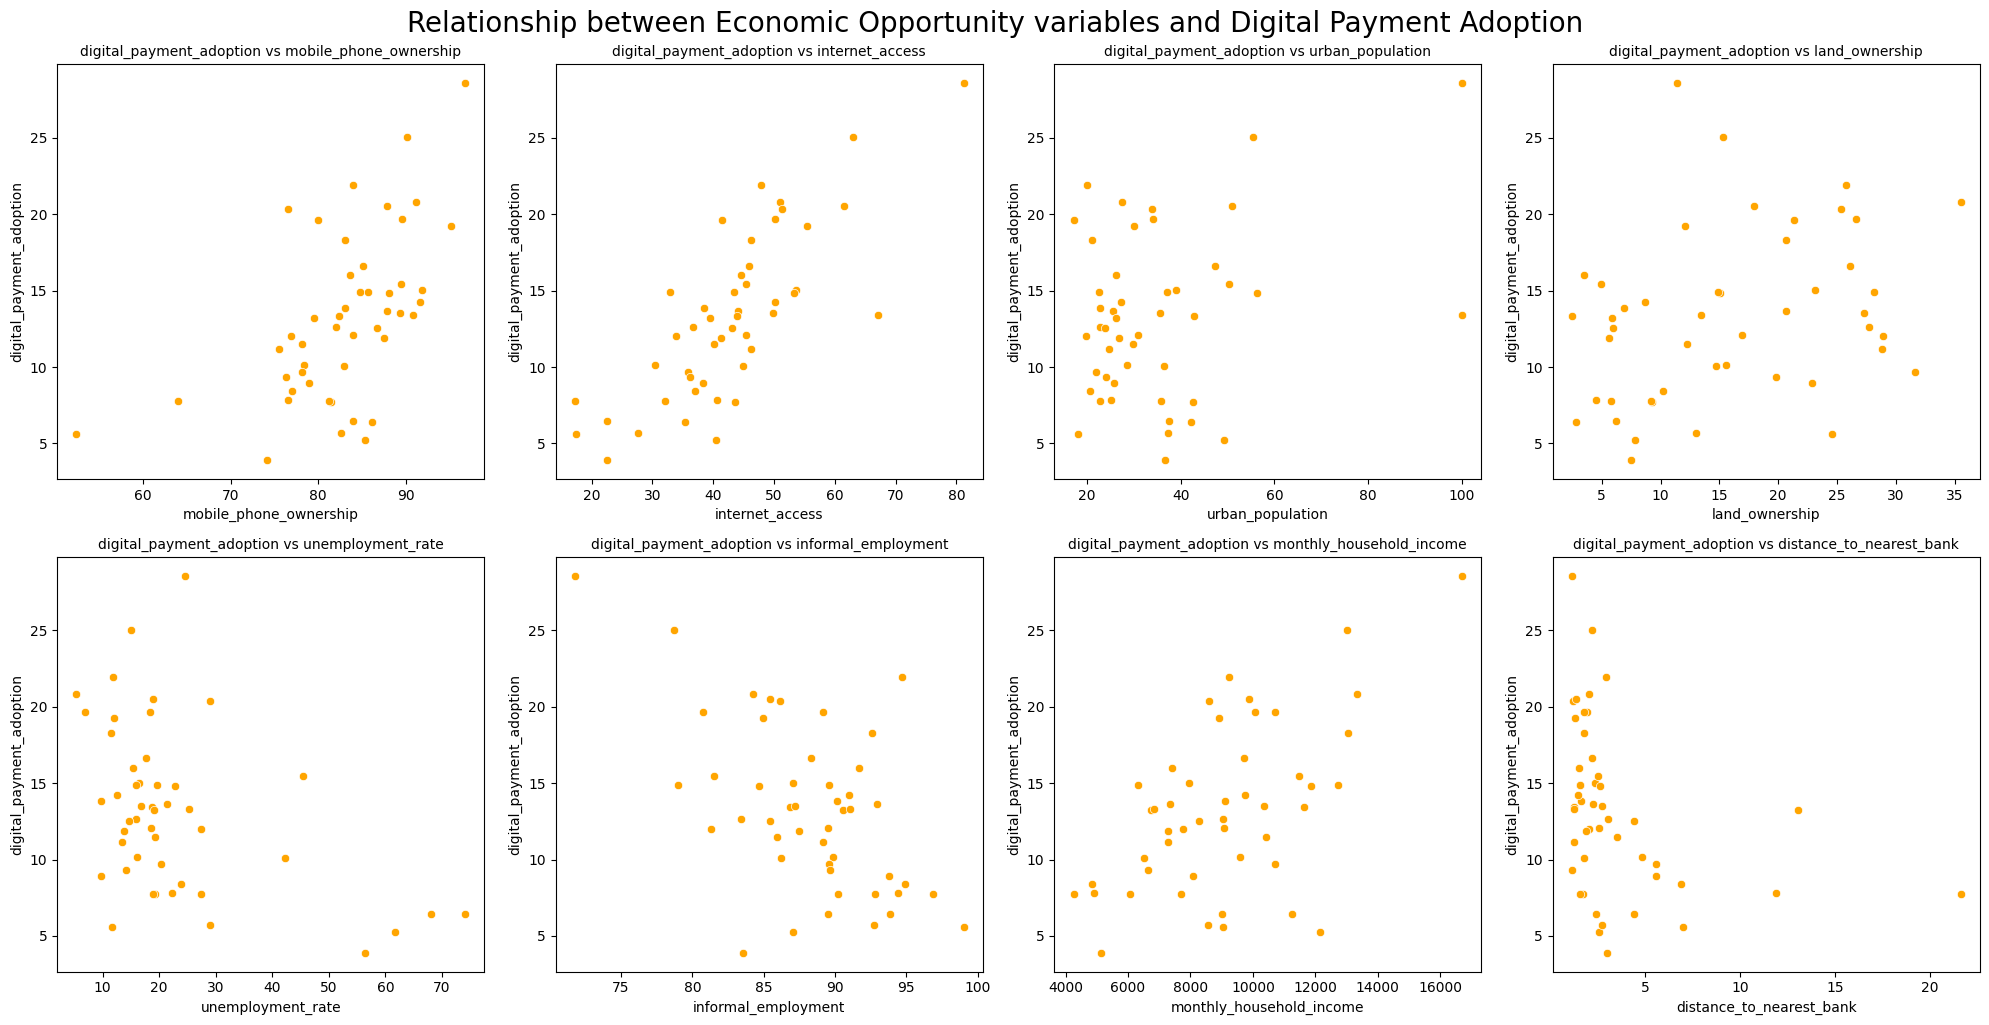

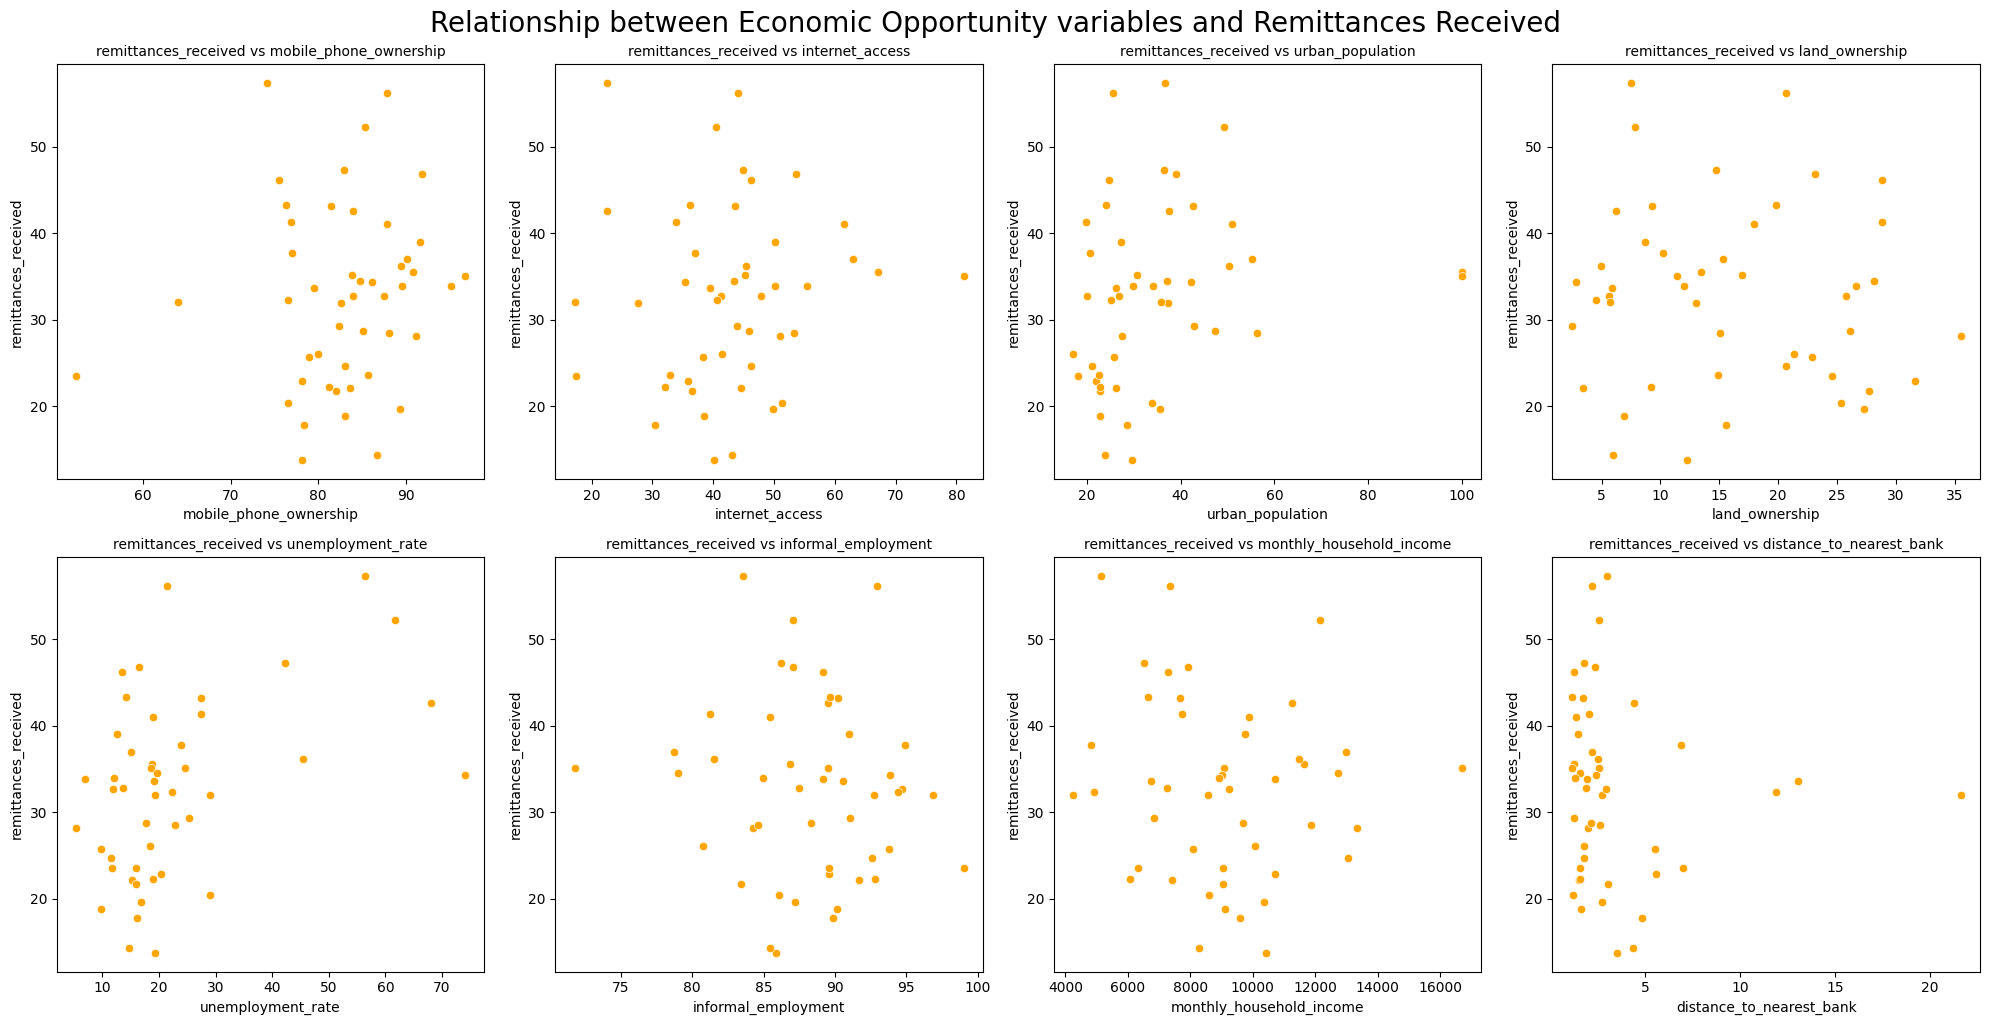

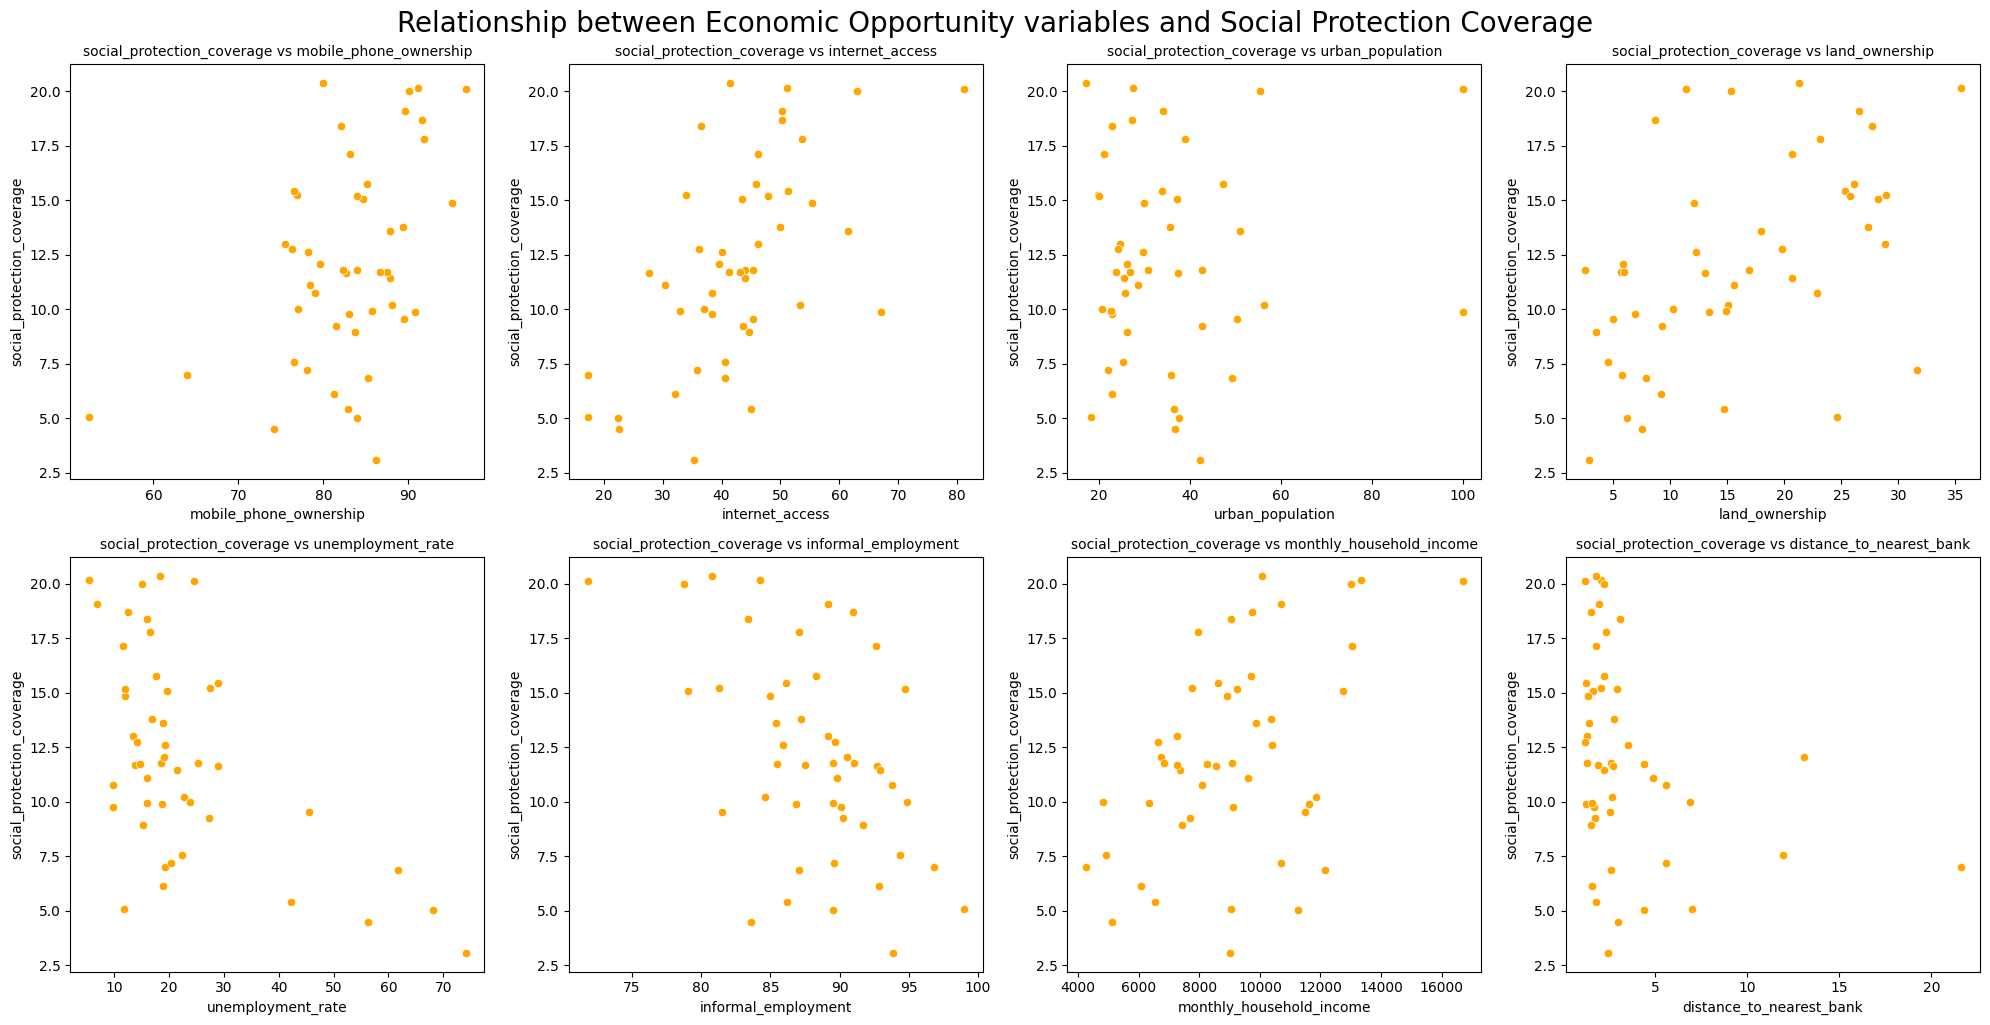

In [56]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the variables
x_vars = [
    'mobile_phone_ownership',
    'internet_access',
    'urban_population',
    'land_ownership',
    'unemployment_rate',
    'informal_employment',
    'monthly_household_income',
    'distance_to_nearest_bank'
]

y_vars = [
    'account_ownership',
    'mobile_money_usage',
    'savings_behaviour',
    'borrowing_behaviour',
    'credit_access',
    'digital_payment_adoption',
    'remittances_received',
    'social_protection_coverage'
]

# Define a plotting function
def plot_scatter_grid(data, x_vars, y_var, color='orange'):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, x_var in enumerate(x_vars):
        sns.scatterplot(
            data=data,
            x=x_var,
            y=y_var,
            ax=axes[i],
            color=color
        )
        axes[i].set_title(f'{y_var} vs {x_var}', fontsize=10)
    
    plt.tight_layout()
    plt.suptitle(f'Relationship between Economic Opportunity variables and {y_var.replace("_", " ").title()}', fontsize=20, y=1.02)
    
    filename = f"finaccess_{y_var.replace('_', '-')}_vs_opportunity.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Loop through each y-variable
for y in y_vars:
    plot_scatter_grid(finaccess_merged_summary, x_vars, y)

There is a strong positive correlation between bank account ownership and mobile phone ownership. This likely reflects the central role of mobile money and mobile banking services in driving financial inclusion in Kenya, where registering with a mobile money provider typically qualifies as owning an account.

Unsurprisingly, a similar positive correlation is observed between mobile money usage and mobile phone ownership, further emphasising the importance of mobile technology in enabling access to financial services.

A weak negative correlation is observed between saving behaviour and the unemployment rate, with counties experiencing lower unemployment generally showing higher rates of saving. This trend may reflect broader economic conditions, where regions with more stable employment and higher incomes provide greater capacity for individuals to save.

There is also a clear positive correlation between digital payment adoption and internet access.

## 4 Conclusions and Recommendations

### 4.1 Evaluation of survey

The FinAccess Household Survey has been conducted every 2–3 years since 2006 by the Central Bank of Kenya, in collaboration with the Kenya National Bureau of Statistics (KNBS) and Financial Sector Deepening (FSD) Kenya. It is a cross-sectional, nationally representative survey targeting Kenyans aged 16 and above living in conventional households, with respondents selected at random.

Some discrepancies exist between the survey sample and the national population in terms of age, gender, and geographic (county-level) distribution. However, these can be addressed through the application of appropriate weighting.

Although the survey does omits certain key indicators of economic infrastructure — such as access to electricity and road density — it nonetheless provides a comprehensive and valuable dataset. It offers strong support for data-driven decision-making in the design and implementation of DataKind’s tools aimed at advancing financial inclusion.

### 4.2 Tackling Financial Exclusion

Financial exclusion remains a significant challenge in Kenya. Bank account ownership is unevenly distributed across the country, ranging from 92.5% in Nairobi to just 44.1% in West Pokot, with a county-level mean of 78.8%.

Exclusion is particularly acute among young people: across counties, an estimated 83.3% of youths aged 15–19 do not have a bank account.

However, our analysis identifies promising pathways to address this issue.

There is a strong association between bank account ownership and mobile phone ownership. In West Pokot — the county with the lowest rate of bank account ownership — 47.6% of adults lack a mobile phone. Among youths aged 15–19, an estimated 60% do not own one, compared to a national county-level mean of 17.1%.

Although causality cannot be established from this data alone, the evidence strongly suggests that mobile phones play a vital role in enabling financial access via mobile money platforms. Expanding mobile phone ownership, particularly in rural areas and among young people, could therefore be a key lever for reducing financial exclusion.

This analysis highlights both the strengths (such as widespread use of mobile money) and the ongoing challenges (including limited access to credit and social protection) in Kenya’s financial inclusion landscape. It suggests that financial inclusion is closely tied to access to mobile technology and broader economic opportunity.

To advance inclusion, policy efforts should also prioritise improving access to credit, digital payment systems, and social protection — especially in regions with high unemployment and informal employment.

---
**Author**: David P Briggs <br>
**Date**:   30 April 2025 <br>
**GitHub**: [https://github.com/dpb24](https://github.com/dpb24) <br>